In [1]:
!unzip /content/problems.zip

Archive:  /content/problems.zip
  inflating: problems/.DS_Store      
  inflating: problems/frag0.csv      
  inflating: problems/frag0.svg      
  inflating: problems/frag01_sol.csv  
  inflating: problems/frag01_sol.svg  
  inflating: problems/frag1.csv      
  inflating: problems/frag1.svg      
  inflating: problems/frag2.csv      
  inflating: problems/frag2.svg      
  inflating: problems/frag2_sol.csv  
  inflating: problems/frag2_sol.svg  
  inflating: problems/isolated.csv   
  inflating: problems/isolated.svg   
  inflating: problems/isolated_sol.csv  
  inflating: problems/isolated_sol.svg  
  inflating: problems/occlusion1.csv  
  inflating: problems/occlusion1.svg  
  inflating: problems/occlusion1_rec.png  
  inflating: problems/occlusion1_rec.svg  
  inflating: problems/occlusion1_sol.csv  
  inflating: problems/occlusion1_sol.svg  
  inflating: problems/occlusion1_sol_rec.png  
  inflating: problems/occlusion1_sol_rec.svg  
  inflating: problems/occlusion2.csv  
  infla

In [2]:
!rm -rf /content/examples_zip.zip

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random

def plot_data(data, output_path):
    fig, ax = plt.subplots(figsize=(10, 10))
    for paths in data:
        for path in paths:
            x, y = path.T
            ax.plot(x, y, marker='o')
    ax.set_aspect('equal')

    # Remove axes and ticks
    ax.axis('off')

    # Remove the frame
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Remove any remaining ticks
    ax.tick_params(axis='both', which='both', length=0)

    # Save the figure with tight layout and without extra whitespace
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

def read_csv_to_path_XYs(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def convert_csv_to_png(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    csv_filenames = [f for f in os.listdir(input_folder) if f.endswith(".csv")]

    for csv_filename in csv_filenames:
        full_csv_path = os.path.join(input_folder, csv_filename)
        path_XYs = read_csv_to_path_XYs(full_csv_path)

        png_filename = csv_filename.replace('.csv', '.png')
        full_png_path = os.path.join(output_folder, png_filename)

        plot_data(path_XYs, full_png_path)
        print(f"Converted {csv_filename} to {png_filename}")


Created output folder: /content/examples
Found 11 CSV files in /content/problems.
Converted frag1.csv to frag1.png
Converted frag01_sol.csv to frag01_sol.png
Converted frag0.csv to frag0.png
Converted frag2.csv to frag2.png
Converted frag2_sol.csv to frag2_sol.png
Converted occlusion2.csv to occlusion2.png
Converted occlusion2_sol.csv to occlusion2_sol.png
Converted occlusion1_sol.csv to occlusion1_sol.png
Converted isolated_sol.csv to isolated_sol.png
Converted occlusion1.csv to occlusion1.png
Converted isolated.csv to isolated.png
Conversion complete. PNG files are saved in /content/examples.


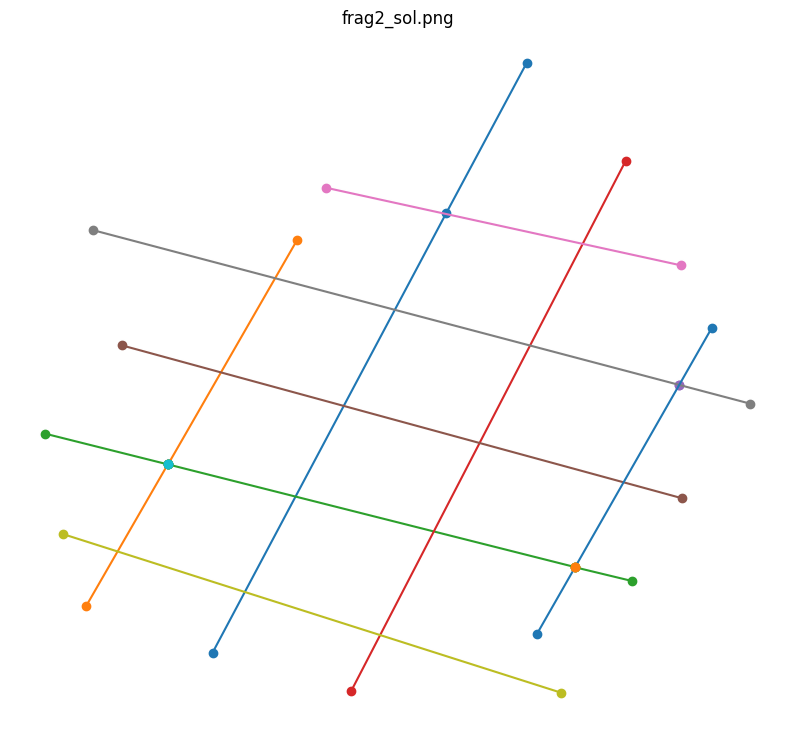

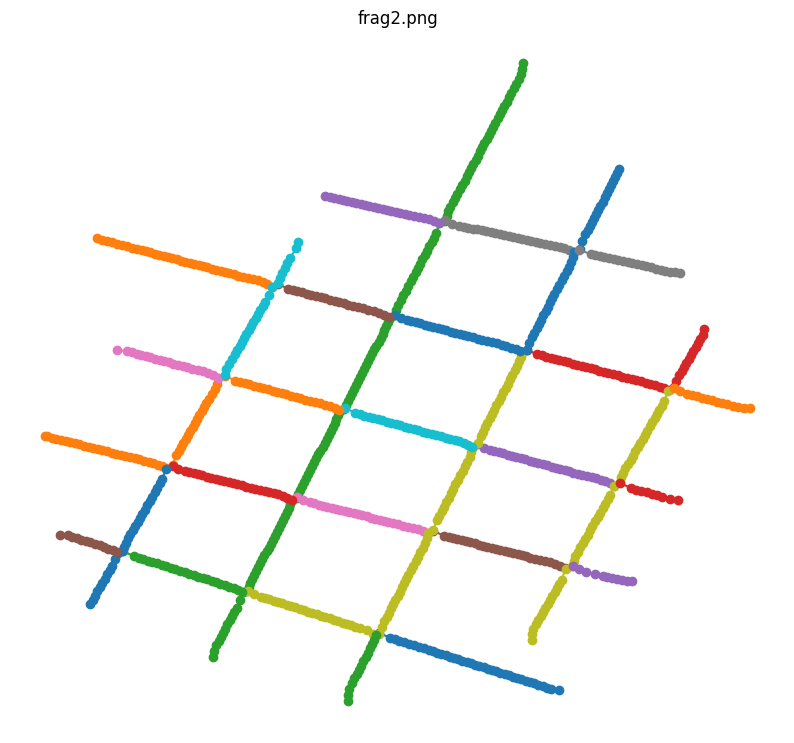

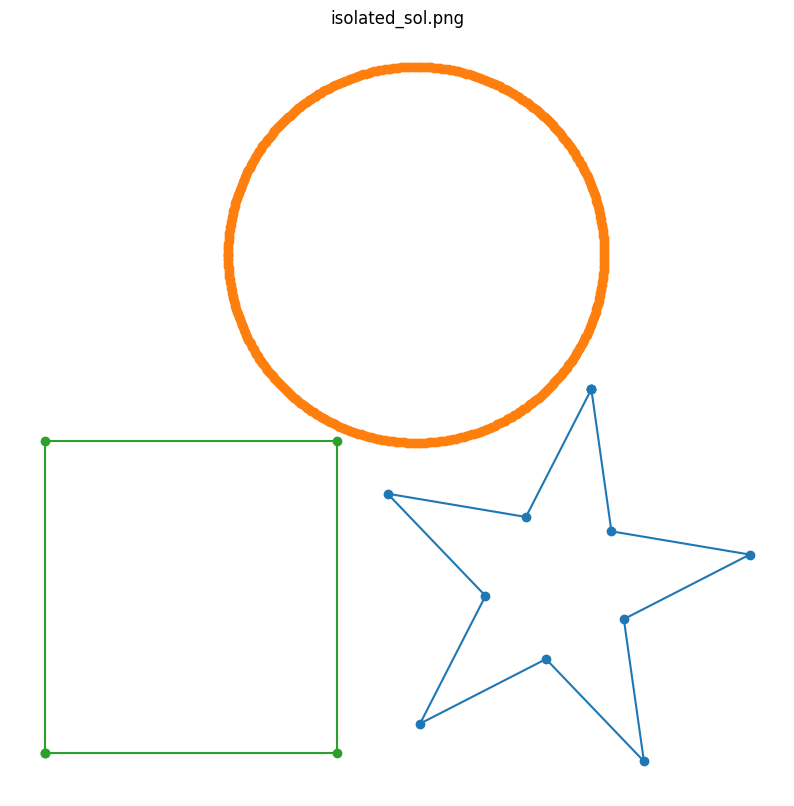

In [4]:
# Main execution
folder_path = "/content/problems"
output_folder = "/content/examples"

# Create the input folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Created input folder: {folder_path}")

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Created output folder: {output_folder}")

# Check if there are CSV files in the input folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
if not csv_files:
    print(f"No CSV files found in {folder_path}. Please upload CSV files to this folder.")
else:
    print(f"Found {len(csv_files)} CSV files in {folder_path}.")
    convert_csv_to_png(folder_path, output_folder)
    print(f"Conversion complete. PNG files are saved in {output_folder}.")

# Optional: Display the first few PNG files
import matplotlib.image as mpimg

png_files = [f for f in os.listdir(output_folder) if f.endswith('.png')]
for png_file in png_files[:3]:  # Display first 3 PNG files
    img = mpimg.imread(os.path.join(output_folder, png_file))
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title(png_file)
    plt.axis('off')
    plt.show()

In [ ]:
'''import shutil

shutil.make_archive('/content/dataset_zip', 'zip', '/content/dataset')

from google.colab import files
files.download('/content/dataset_zip.zip')'''

"import shutil\n\nshutil.make_archive('/content/dataset_zip', 'zip', '/content/dataset')\n\nfrom google.colab import files\nfiles.download('/content/dataset_zip.zip')"

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow

def detect_and_regularize_shapes(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    canvas = image.copy()  # Use a copy of the original image instead of a blank canvas

    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)

        if len(approx) == 3:
            shape = "triangle"
            cv2.drawContours(canvas, [approx], 0, (0, 255, 0), 2)

        elif len(approx) == 4:
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h
            if 0.95 <= aspect_ratio <= 1.05:
                shape = "square"
            else:
                shape = "rectangle"
            cv2.drawContours(canvas, [approx], 0, (0, 0, 255), 2)

        elif len(approx) == 5:
            shape = "pentagon"
            cv2.drawContours(canvas, [approx], 0, (255, 0, 0), 2)

        elif len(approx) == 6:
            shape = "hexagon"
            cv2.drawContours(canvas, [approx], 0, (255, 255, 0), 2)

        elif len(approx) > 6:
            # Check for circle or ellipse
            area = cv2.contourArea(contour)
            circularity = 4 * np.pi * area / (perimeter * perimeter)
            if circularity > 0.8:
                (x, y), radius = cv2.minEnclosingCircle(contour)
                center = (int(x), int(y))
                radius = int(radius)
                cv2.circle(canvas, center, radius, (0, 255, 255), 2)
                shape = "circle"
            else:
                ellipse = cv2.fitEllipse(contour)
                cv2.ellipse(canvas, ellipse, (255, 0, 255), 2)
                shape = "ellipse"

        else:
            shape = "unknown"
            cv2.drawContours(canvas, [contour], 0, (128, 128, 128), 2)

        # Add shape label
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.putText(canvas, shape, (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    return canvas

def process_images(image_paths):
    image_names = []
    results = {}

    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Could not load the image {image_path}.")
            continue

        image_name = os.path.basename(image_path)
        image_names.append(image_name)
        output_image = detect_and_regularize_shapes(image)
        results[image_name] = {'processed_image': output_image}

    return image_names, results


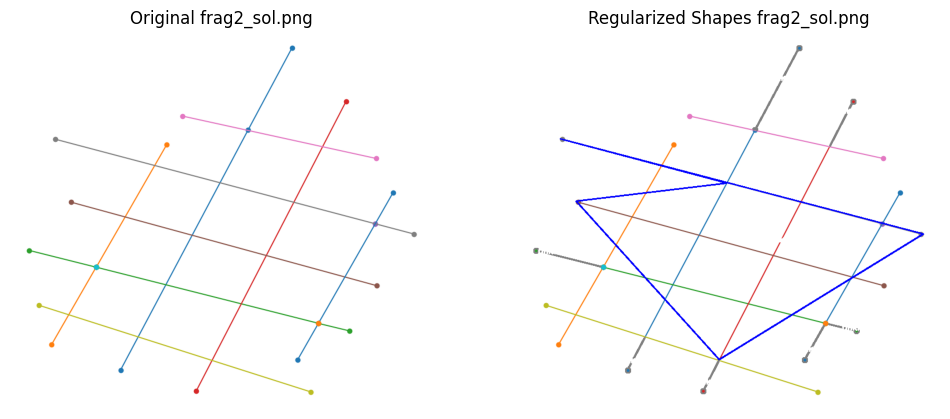

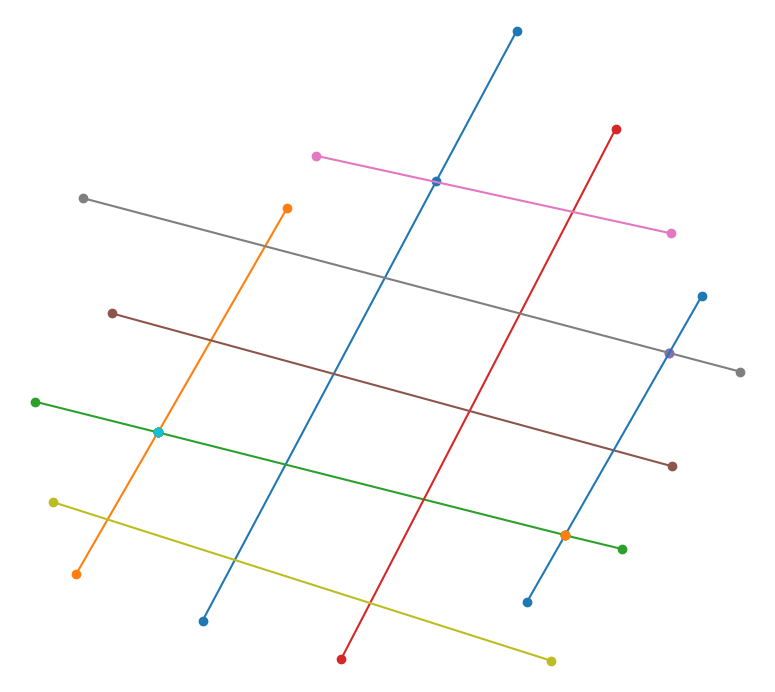

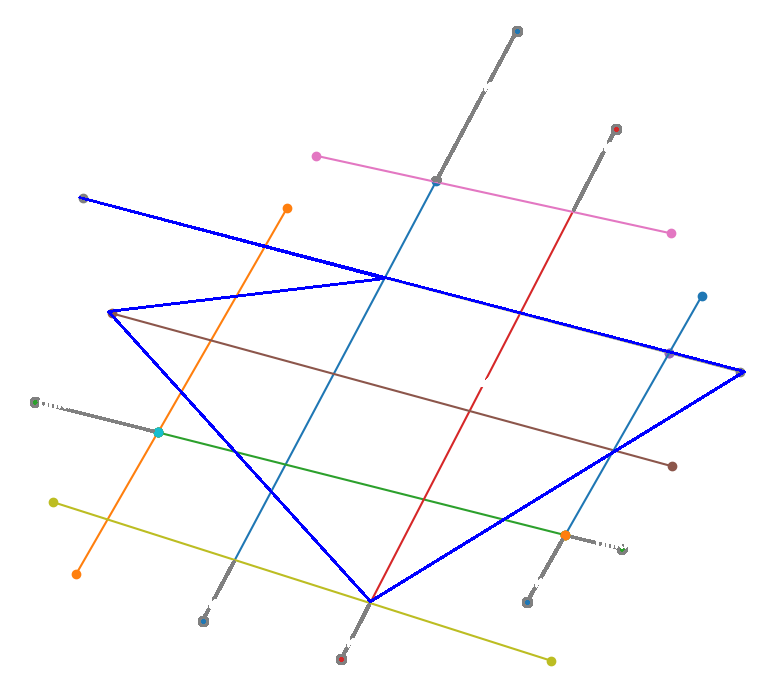

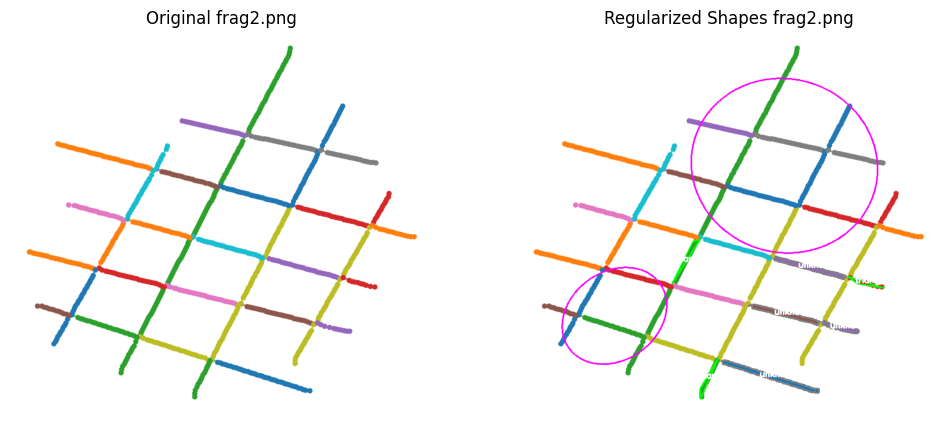

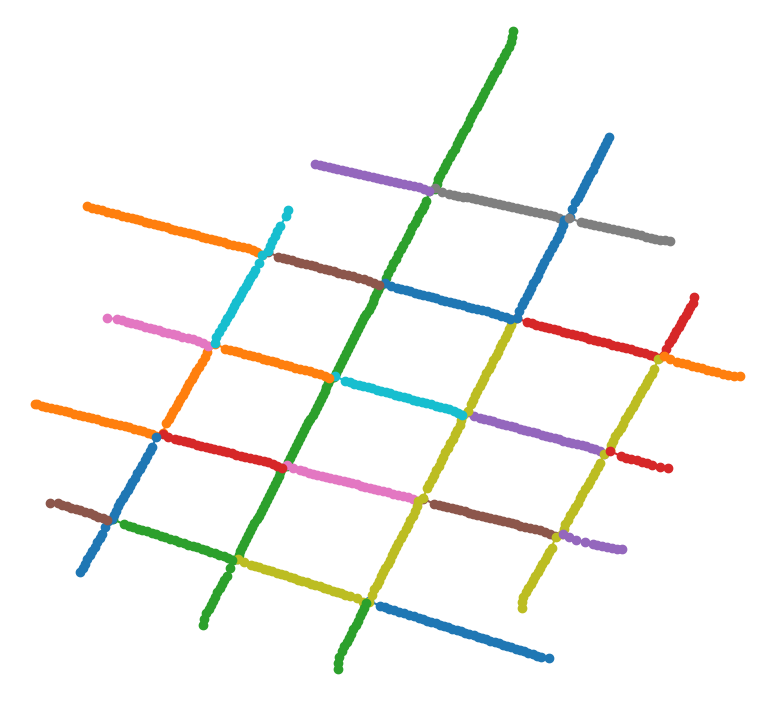

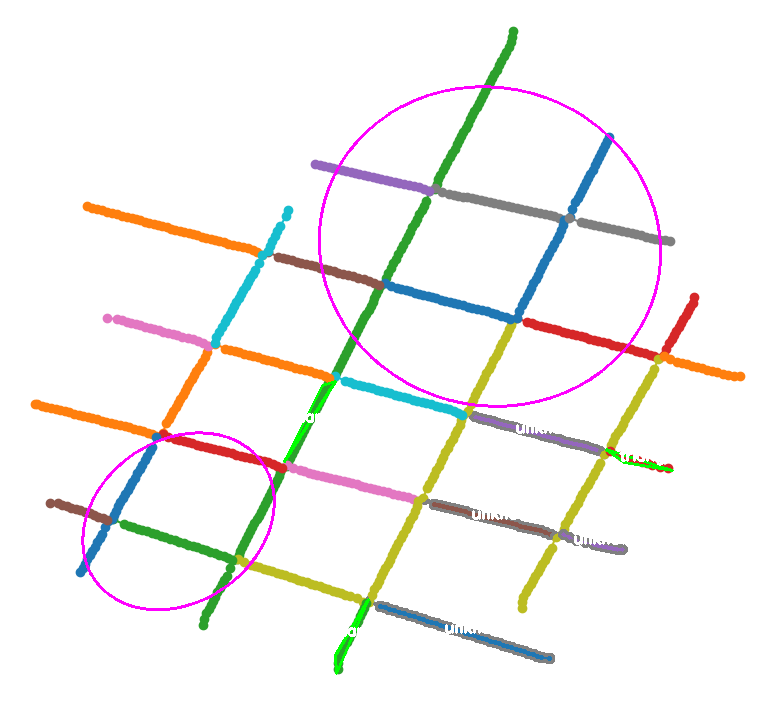

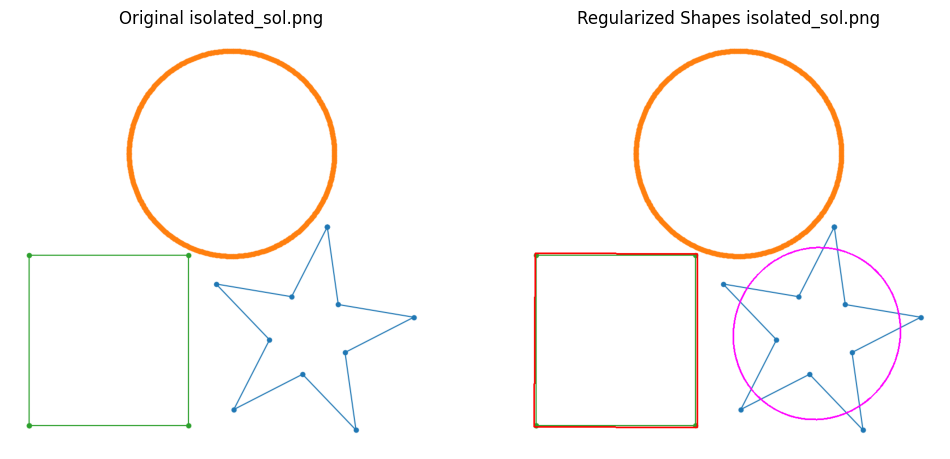

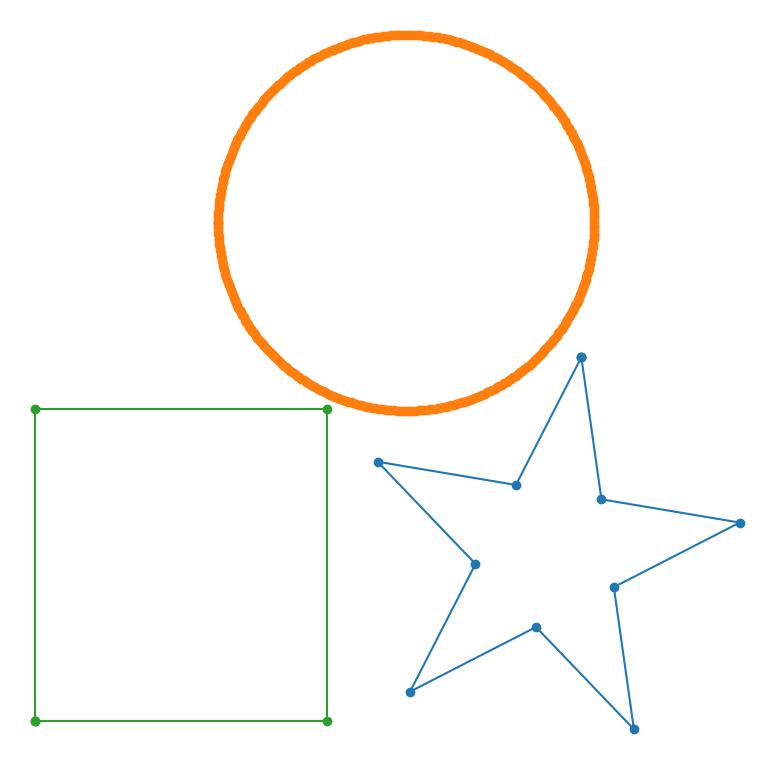

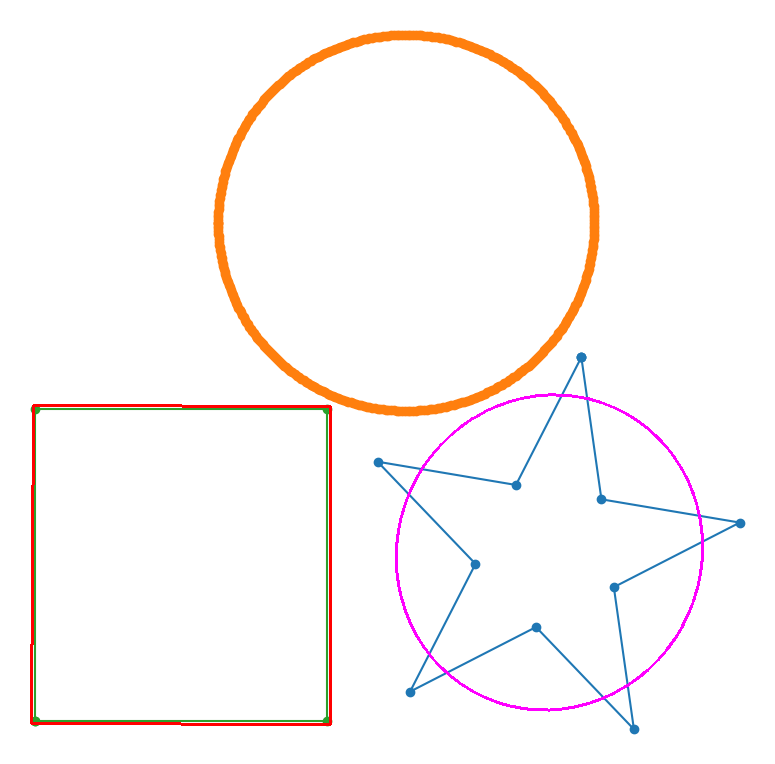

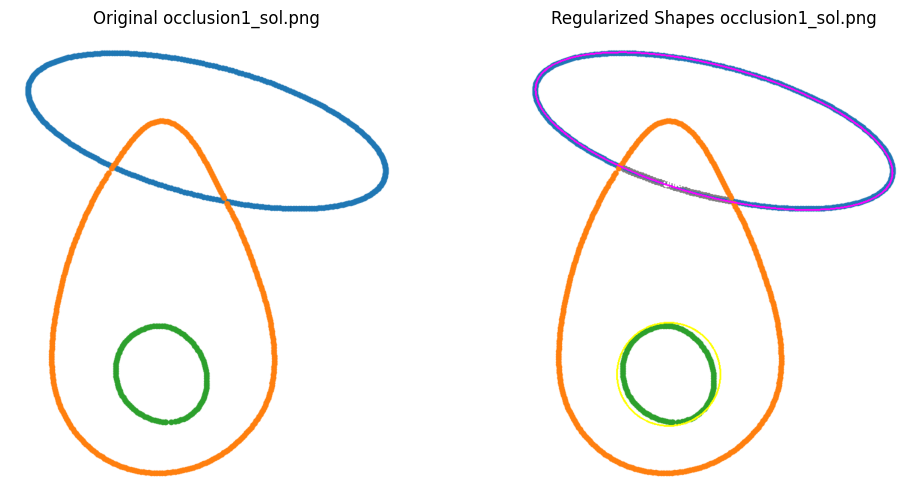

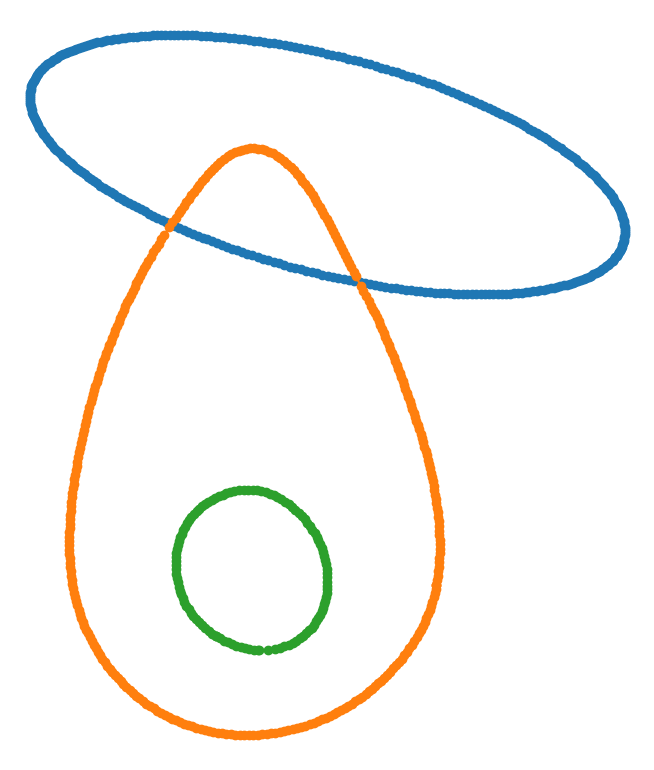

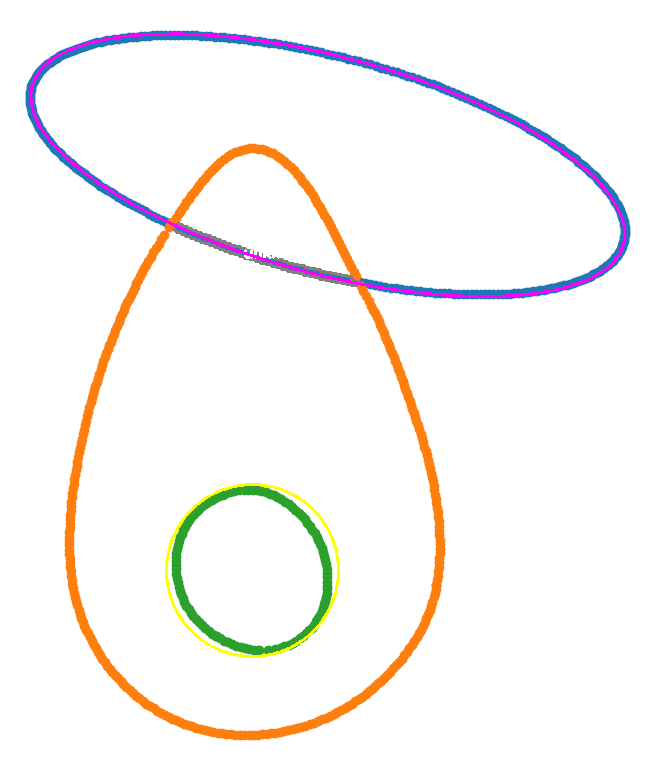

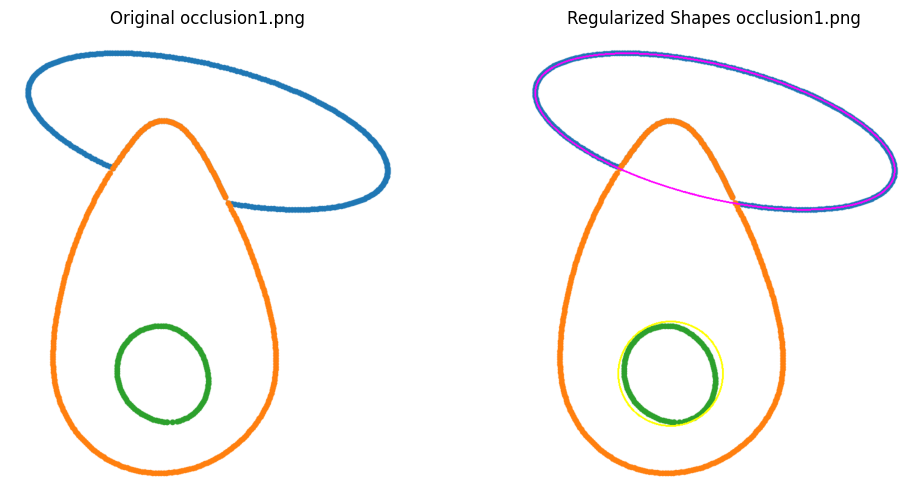

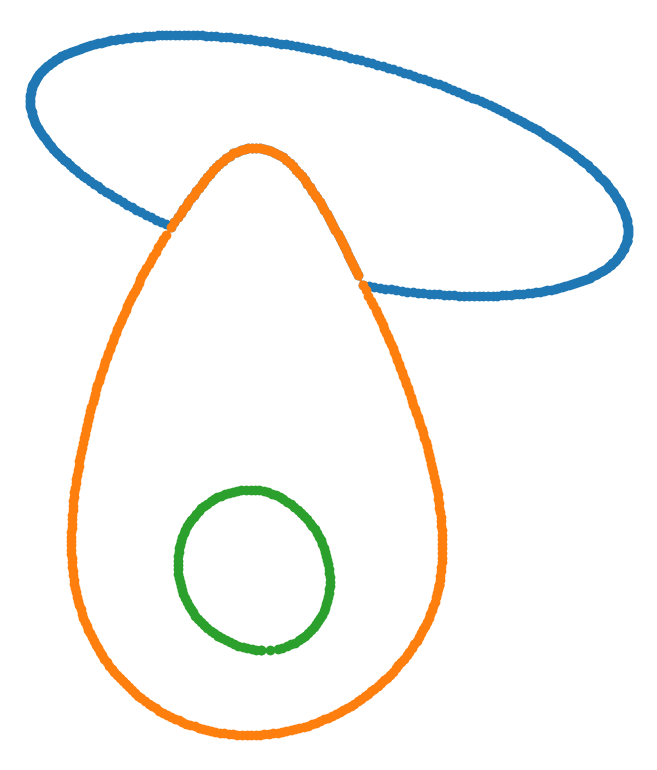

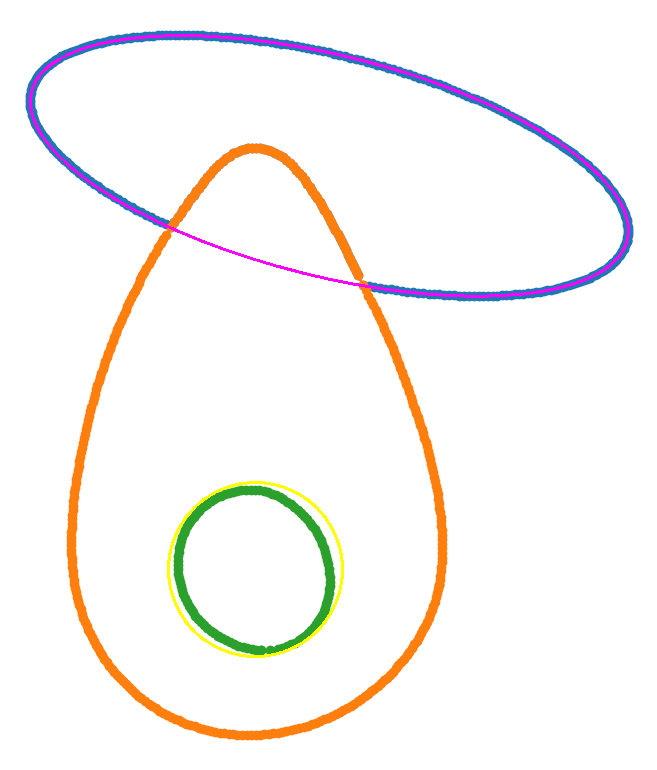

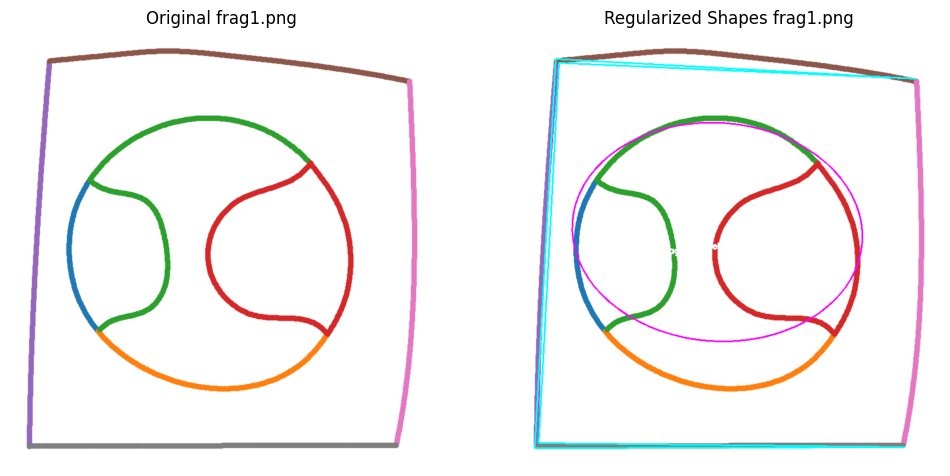

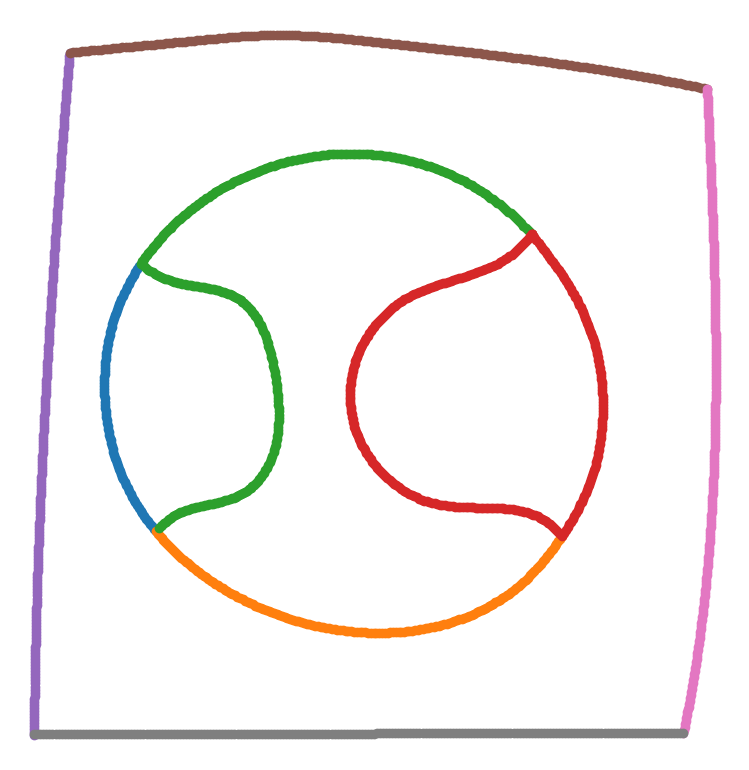

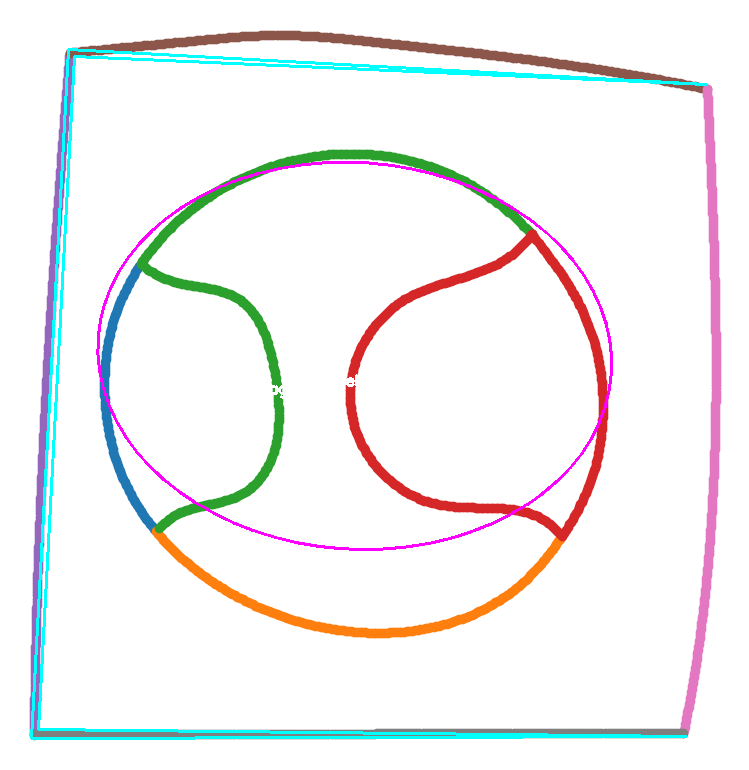

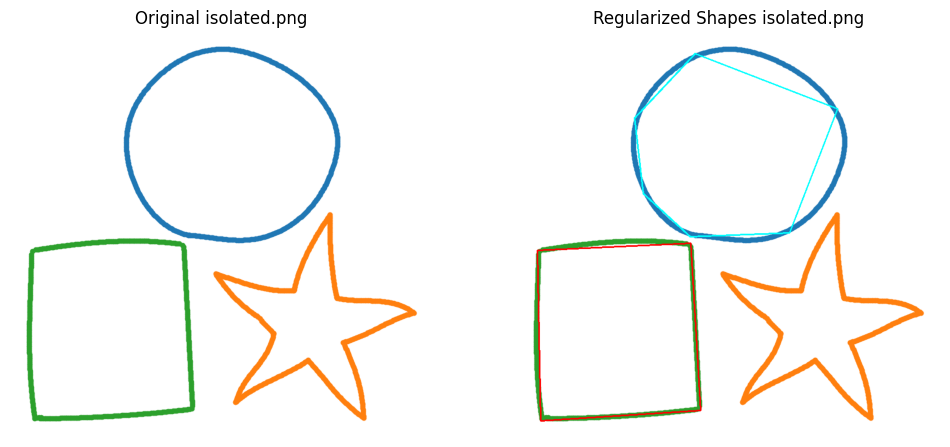

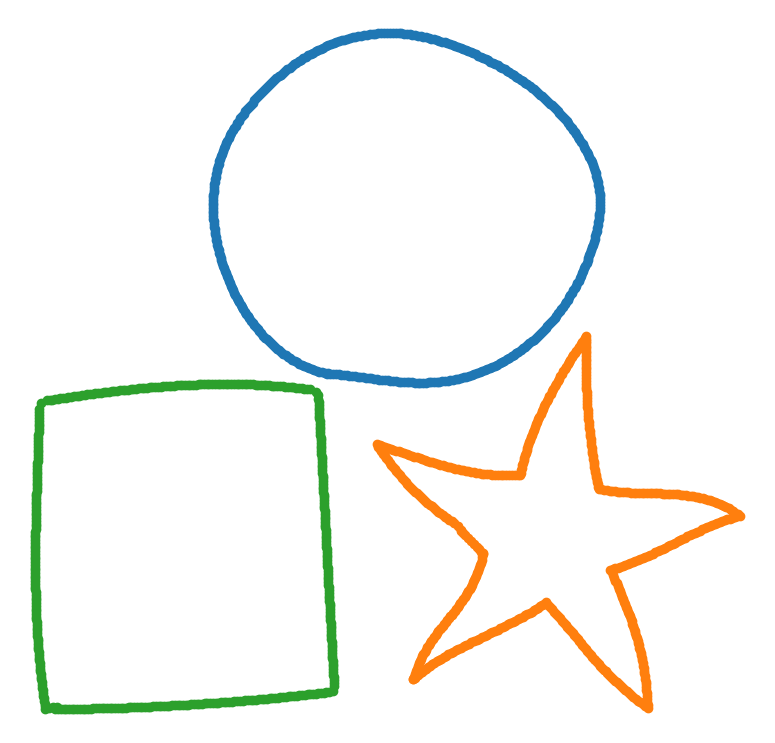

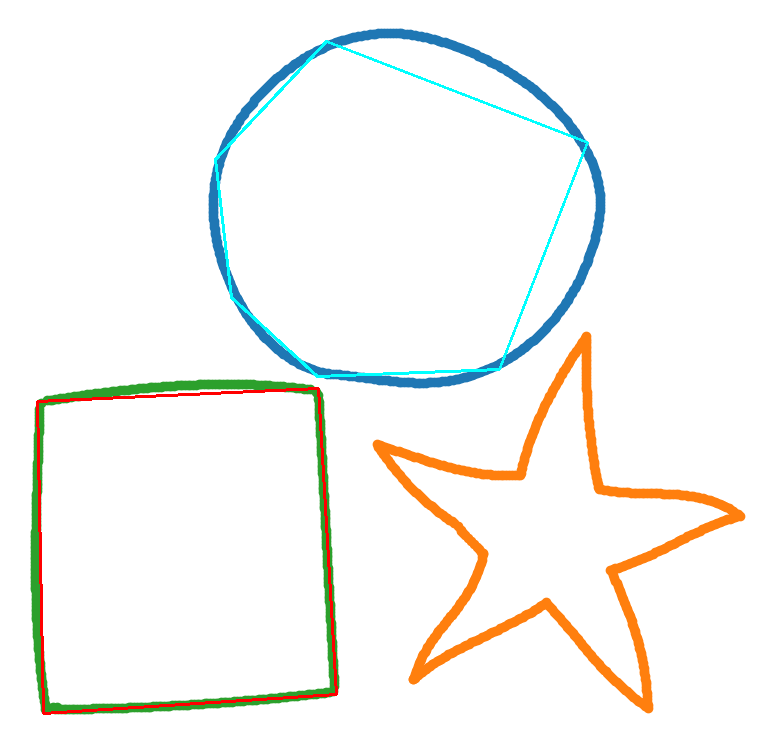

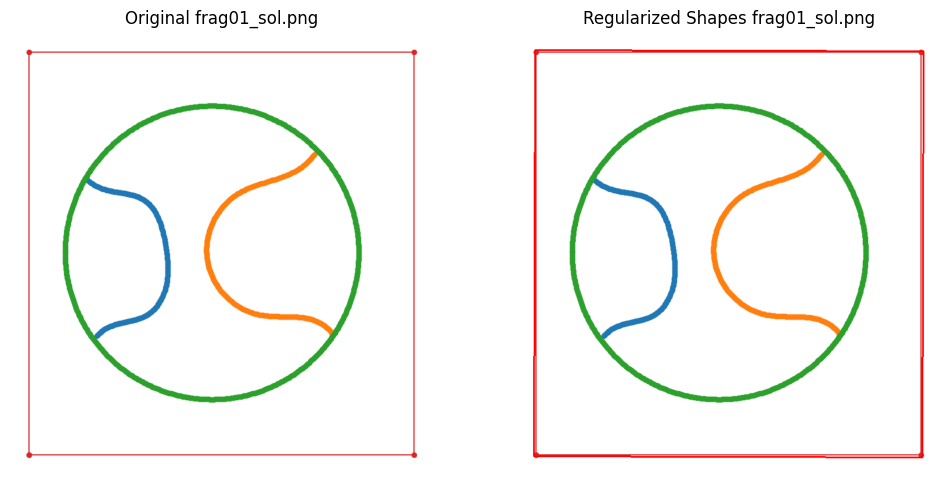

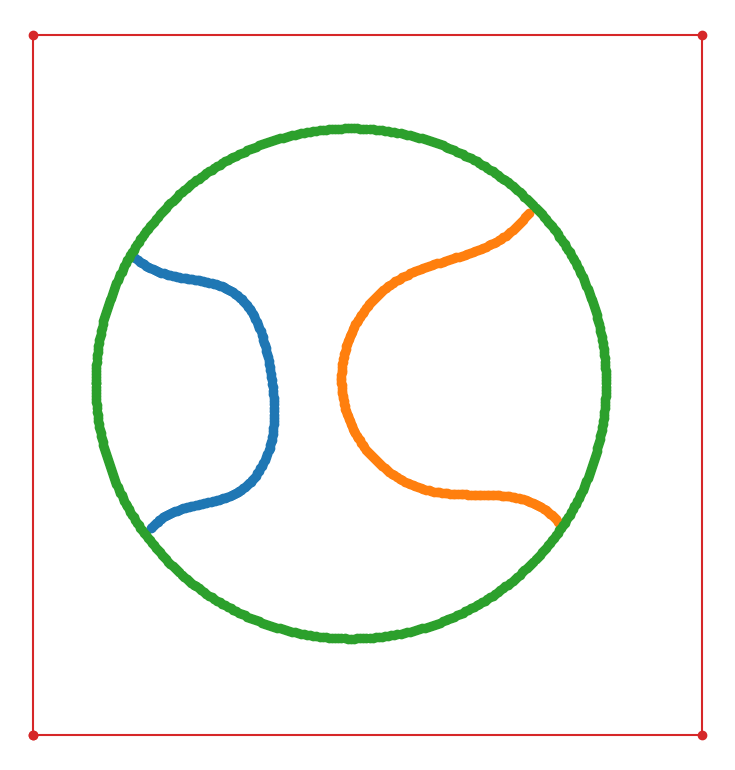

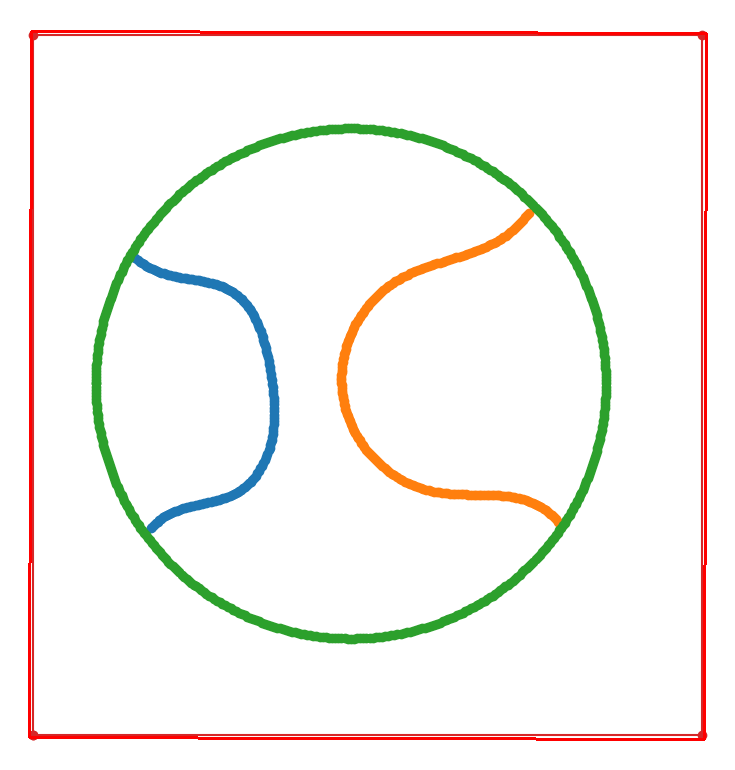

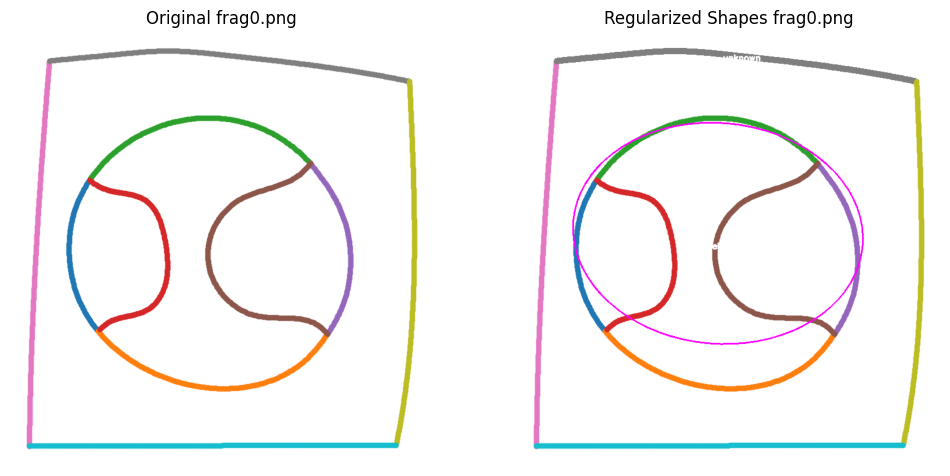

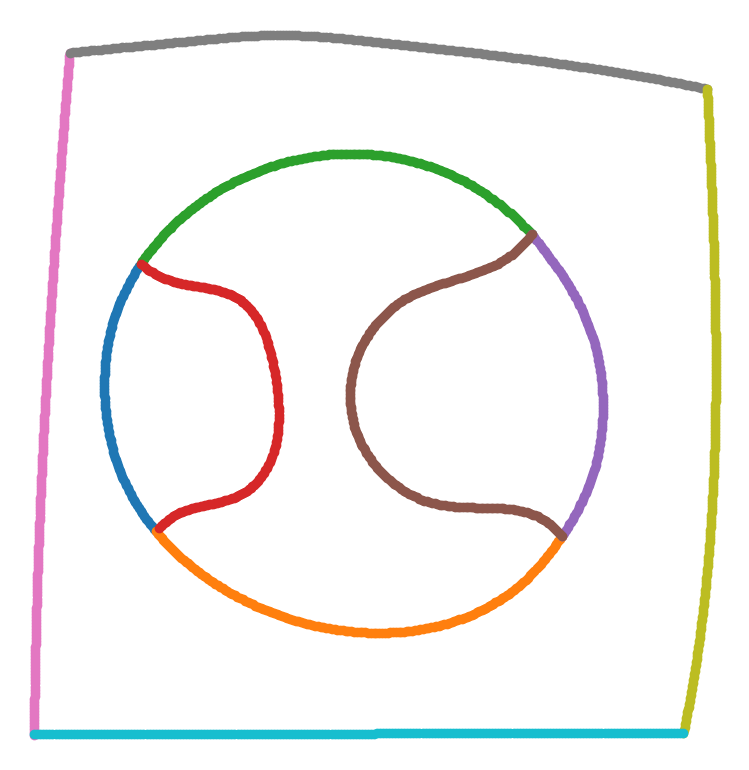

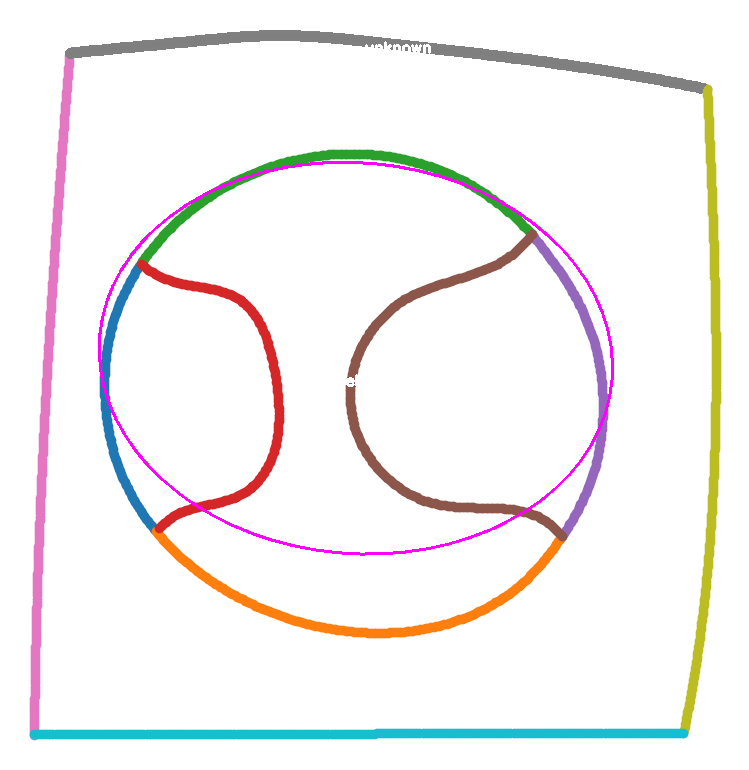

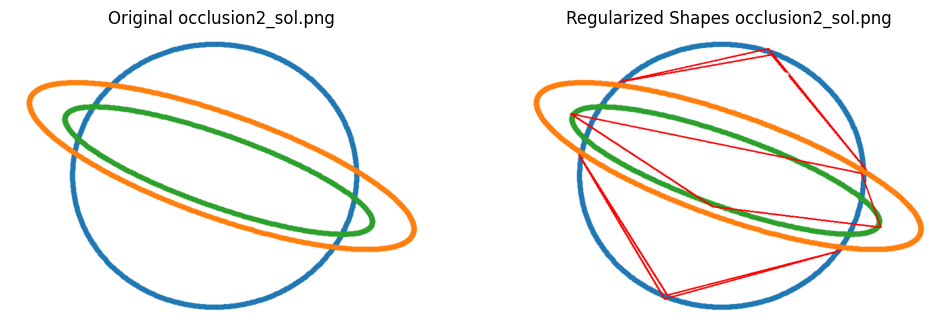

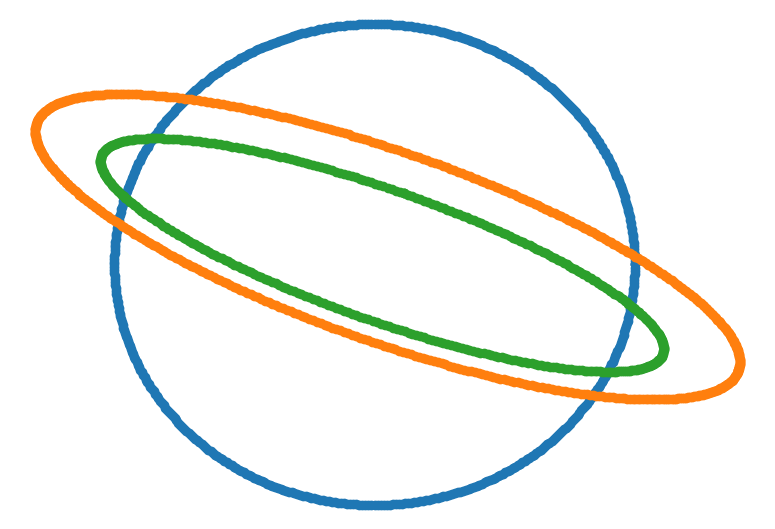

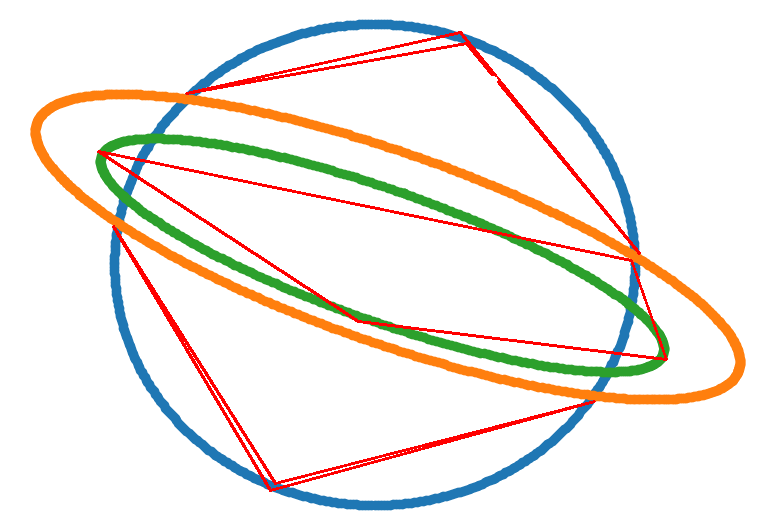

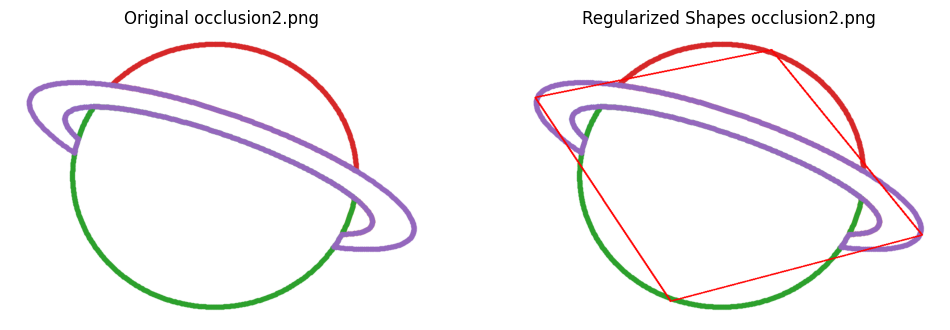

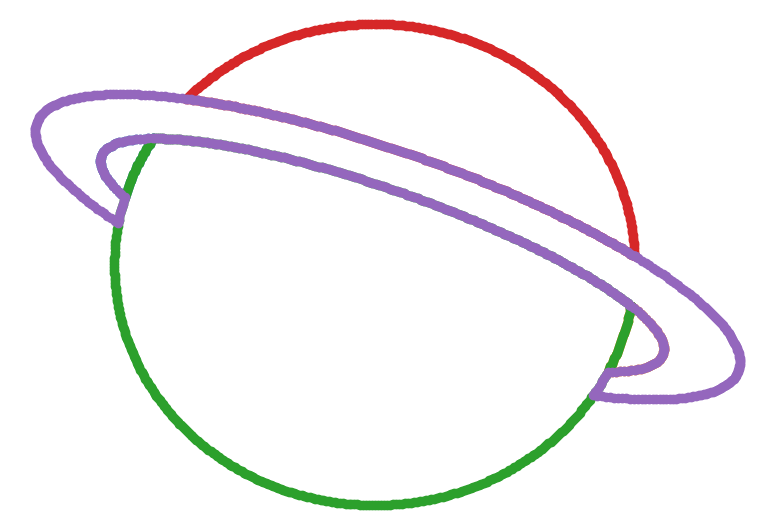

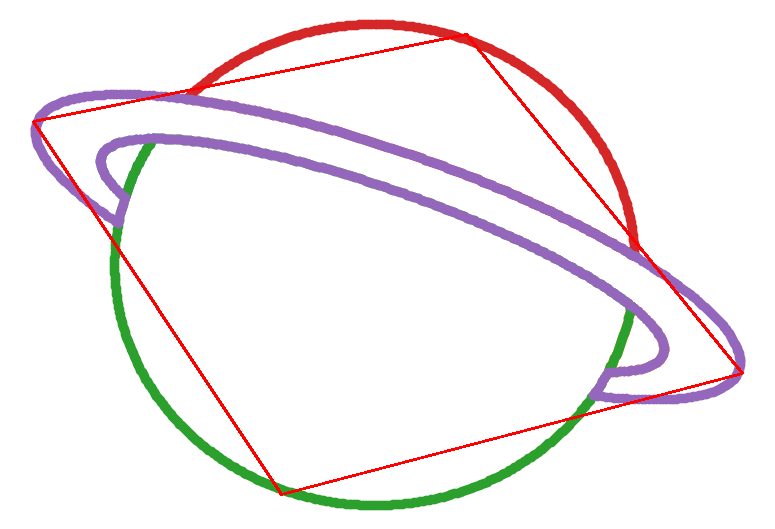

In [2]:
def display_images(image_paths, results):
    for image_path in image_paths:
        image_name = os.path.basename(image_path)
        output_image = results[image_name]['processed_image']
        original_image = cv2.imread(image_path)

        original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(original_image_rgb)
        plt.title(f'Original {image_name}')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(output_image_rgb)
        plt.title(f'Regularized Shapes {image_name}')
        plt.axis('off')

        plt.show()

        cv2_imshow(original_image)
        cv2_imshow(output_image)

dataset_directory = "/content/examples"
image_files = [os.path.join(dataset_directory, f) for f in os.listdir(dataset_directory) if f.endswith(('.jpg', '.png', '.jpeg'))]

image_names, results = process_images(image_files)
display_images(image_files, results)

In [3]:
import cv2
import os
import matplotlib.pyplot as plt

def check_horizontal_symmetry(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Unable to read the image file {image_path}")
        return

    img_symmetry = img.copy()
    cv2.line(img_symmetry, (0, img.shape[0] // 2), (img.shape[1], img.shape[0] // 2), (255, 0, 255), 5)

    return img, img_symmetry

def check_vertical_symmetry(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Unable to read the image file {image_path}")
        return

    img_symmetry = img.copy()
    cv2.line(img_symmetry, (img.shape[1] // 2, 0), (img.shape[1] // 2, img.shape[0]), (255, 0, 255), 5)

    return img, img_symmetry

def process_image(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Unable to read the image file {image_path}")
        return

    return img

Processing image: frag2_sol.png
Processing image: frag2.png
Processing image: isolated_sol.png
Processing image: occlusion1_sol.png
Processing image: occlusion1.png
Processing image: frag1.png
Processing image: isolated.png
Processing image: frag01_sol.png
Processing image: frag0.png
Processing image: occlusion2_sol.png
Processing image: occlusion2.png


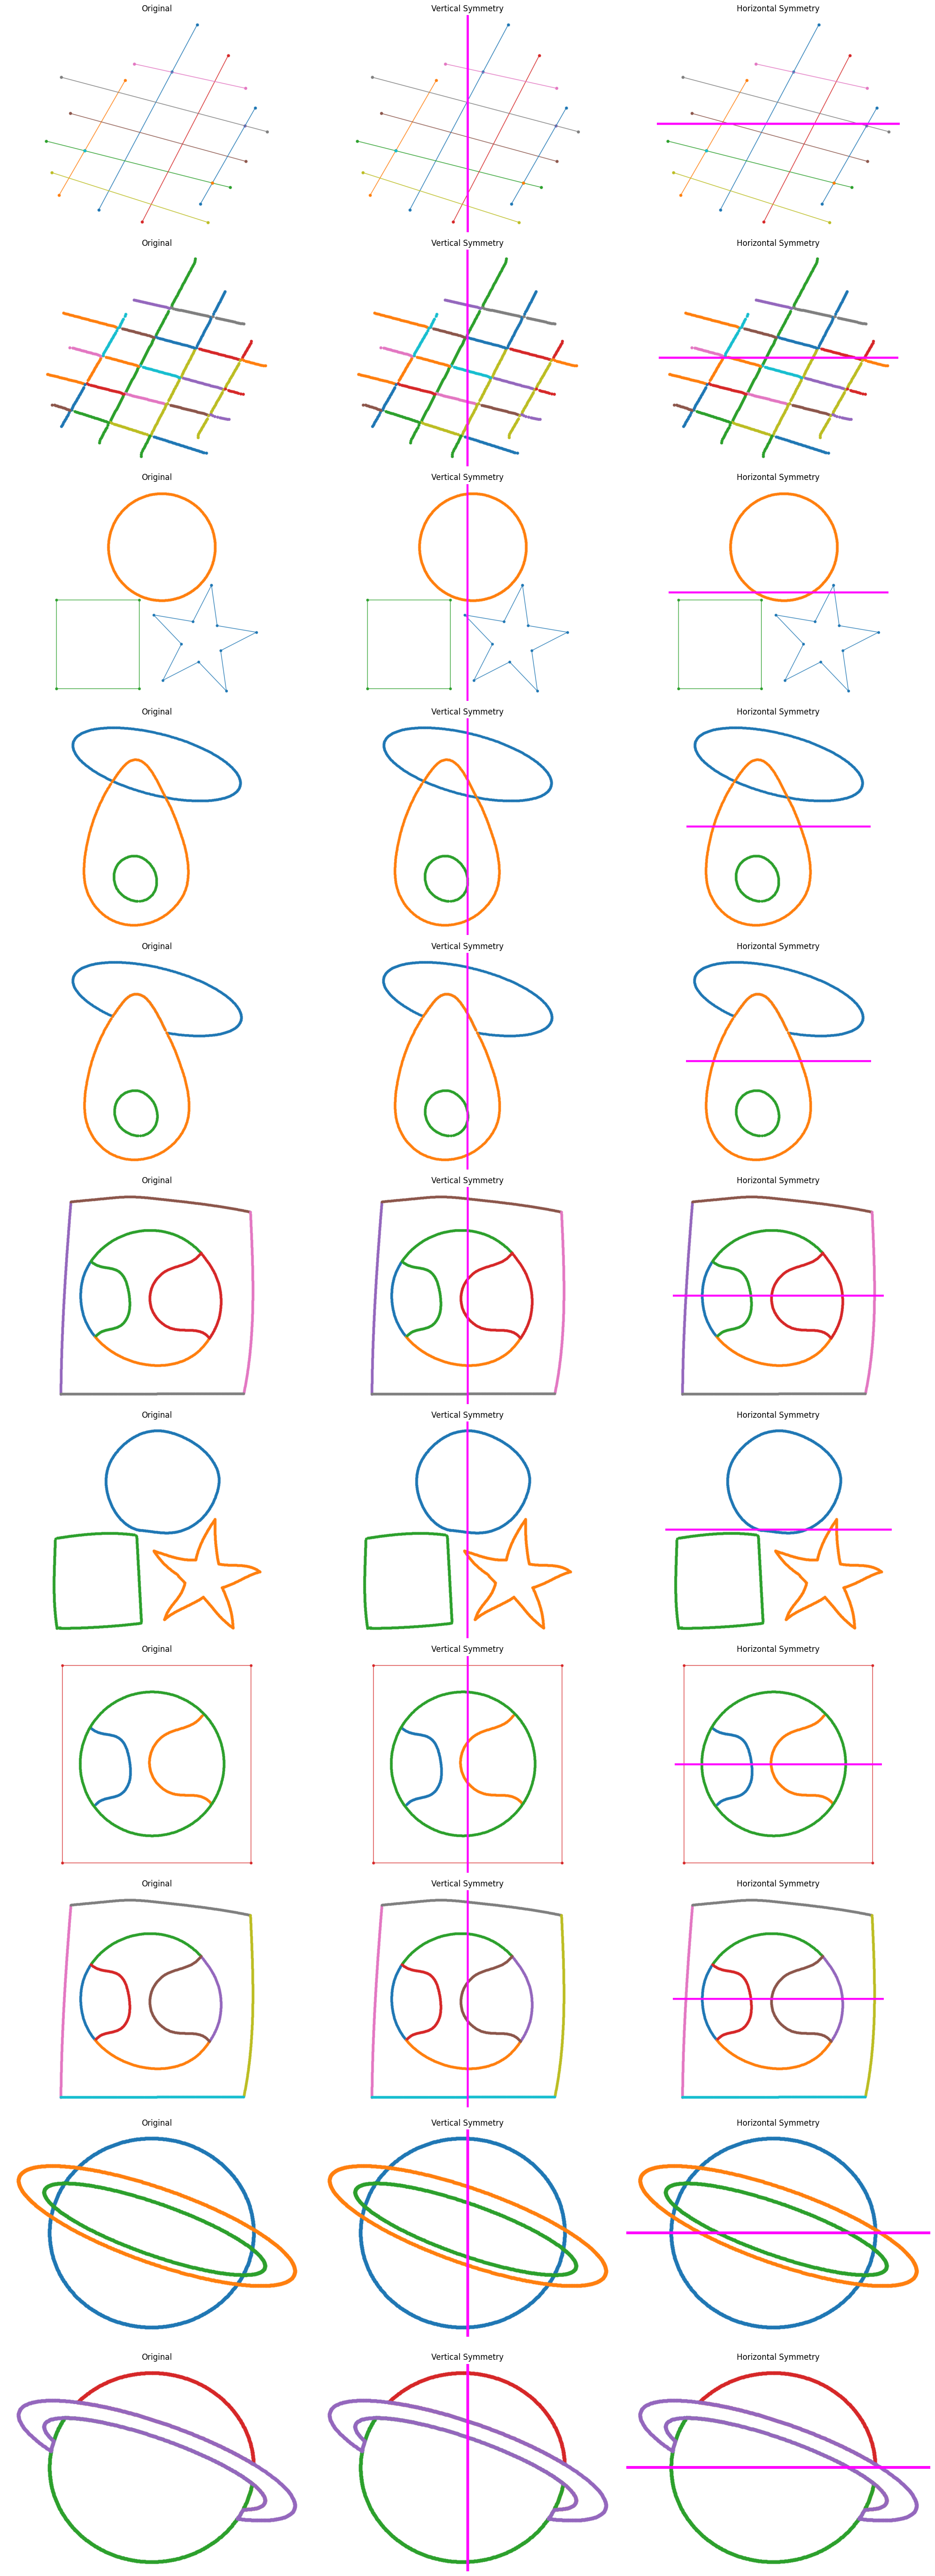

In [4]:
dataset_directory = '/content/examples'
image_files = [f for f in os.listdir(dataset_directory) if f.endswith(('.jpg', '.png', '.jpeg'))]

fig = plt.figure(figsize=(20, 5 * len(image_files)))

for i, image_file in enumerate(image_files):
    image_path = os.path.join(dataset_directory, image_file)

    print(f"Processing image: {image_file}")

    # Process the image
    original = process_image(image_path)

    # Check vertical symmetry
    _, vertical_symmetry = check_vertical_symmetry(image_path)

    # Check horizontal symmetry
    _, horizontal_symmetry = check_horizontal_symmetry(image_path)

    # Display images
    ax1 = fig.add_subplot(len(image_files), 3, i*3 + 1)
    ax1.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original')
    ax1.axis('off')

    ax2 = fig.add_subplot(len(image_files), 3, i*3 + 2)
    ax2.imshow(cv2.cvtColor(vertical_symmetry, cv2.COLOR_BGR2RGB))
    ax2.set_title('Vertical Symmetry')
    ax2.axis('off')

    ax3 = fig.add_subplot(len(image_files), 3, i*3 + 3)
    ax3.imshow(cv2.cvtColor(horizontal_symmetry, cv2.COLOR_BGR2RGB))
    ax3.set_title('Horizontal Symmetry')
    ax3.axis('off')

plt.tight_layout()
plt.show()

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files

# Function to find symmetry points
def find_symmetry_points(contour):
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX, cY = int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    symmetry_axes = []
    n = len(approx)
    for i in range(n):
        for j in range(i+1, n):
            pt1, pt2 = tuple(approx[i][0]), tuple(approx[j][0])
            dist_to_center = np.abs((pt2[1]-pt1[1])*cX - (pt2[0]-pt1[0])*cY + pt2[0]*pt1[1] - pt2[1]*pt1[0]) / np.sqrt((pt2[1]-pt1[1])**2 + (pt2[0]-pt1[0])**2)
            if dist_to_center < 5:
                symmetry_axes.append((pt1, pt2))

    intersection_points = set()
    for axis in symmetry_axes:
        for i in range(len(contour)):
            pt1, pt2 = tuple(contour[i][0]), tuple(contour[(i+1) % len(contour)][0])
            intersection = line_intersection(axis[0], axis[1], pt1, pt2)
            if intersection:
                intersection_points.add(intersection)

    return list(intersection_points)

def line_intersection(line1_pt1, line1_pt2, line2_pt1, line2_pt2):
    x1, y1 = line1_pt1
    x2, y2 = line1_pt2
    x3, y3 = line2_pt1
    x4, y4 = line2_pt2

    denominator = (x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
    if denominator == 0:
        return None

    t = ((x1-x3)*(y3-y4) - (y1-y3)*(x3-x4)) / denominator
    u = -((x1-x2)*(y1-y3) - (y1-y2)*(x1-x3)) / denominator

    if 0 <= t <= 1 and 0 <= u <= 1:
        x = int(x1 + t*(x2-x1))
        y = int(y1 + t*(y2-y1))
        return (x, y)
    return None

def process_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to gray-scale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Invert the colours
    gray_inverted = cv2.bitwise_not(gray)

    # Create a binary thresholded image
    _, binary = cv2.threshold(gray_inverted, 100, 255, cv2.THRESH_BINARY)

    # Find the contours from the thresholded image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Create a white image for drawing
    result_image = np.ones_like(image) * 255

    # Draw smooth contours and symmetry points
    for contour in contours:
        # Draw the smooth contour
        cv2.drawContours(result_image, [contour], 0, (0, 0, 0), 2)  # Black contour

        # Find and draw symmetry points
        symmetry_points = find_symmetry_points(contour)
        for point in symmetry_points:
            cv2.circle(result_image, point, 5, (0, 0, 255), -1)  # Red symmetry points

    return result_image



Found 12 PNG files in /content/examples.


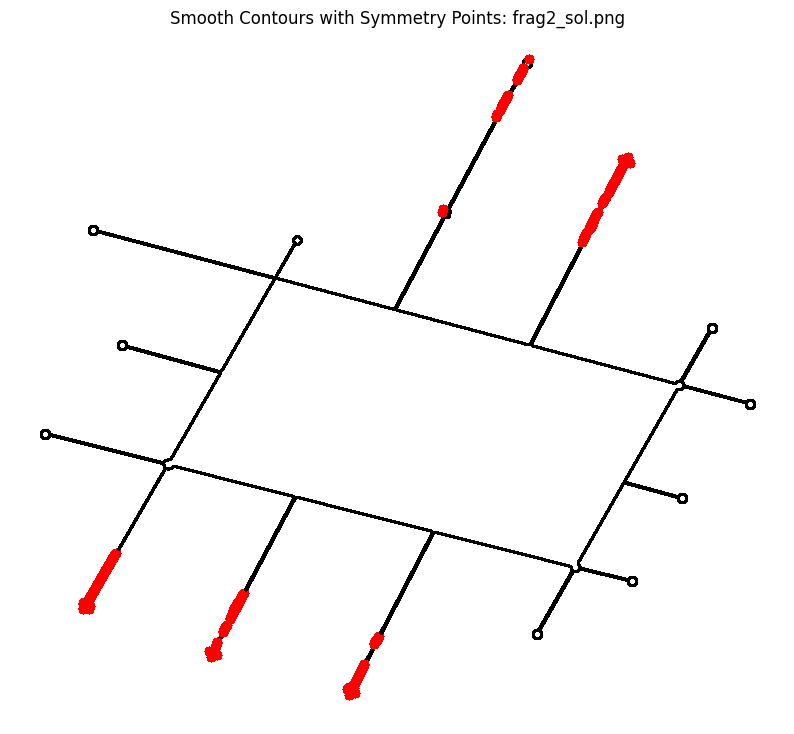

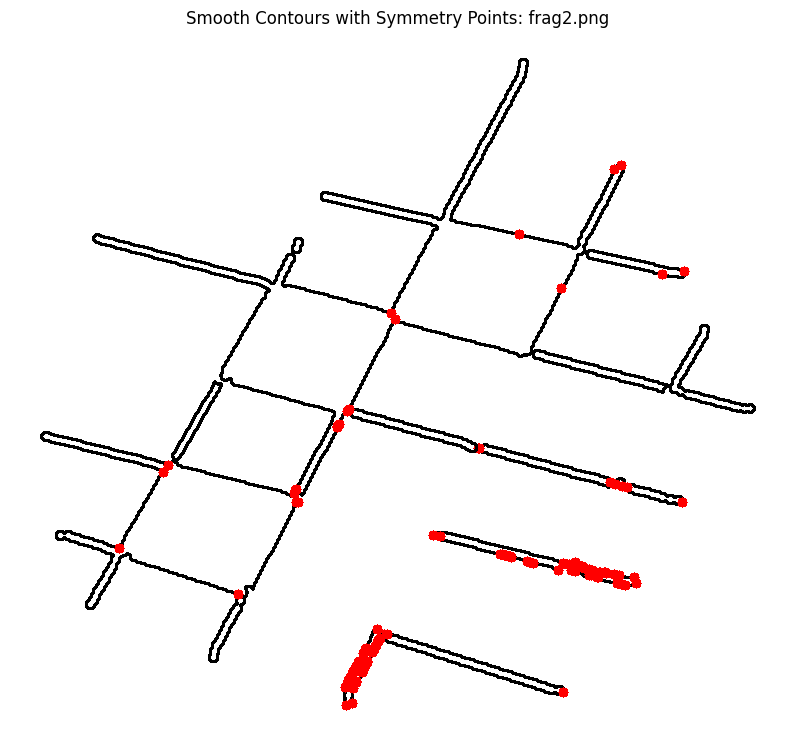

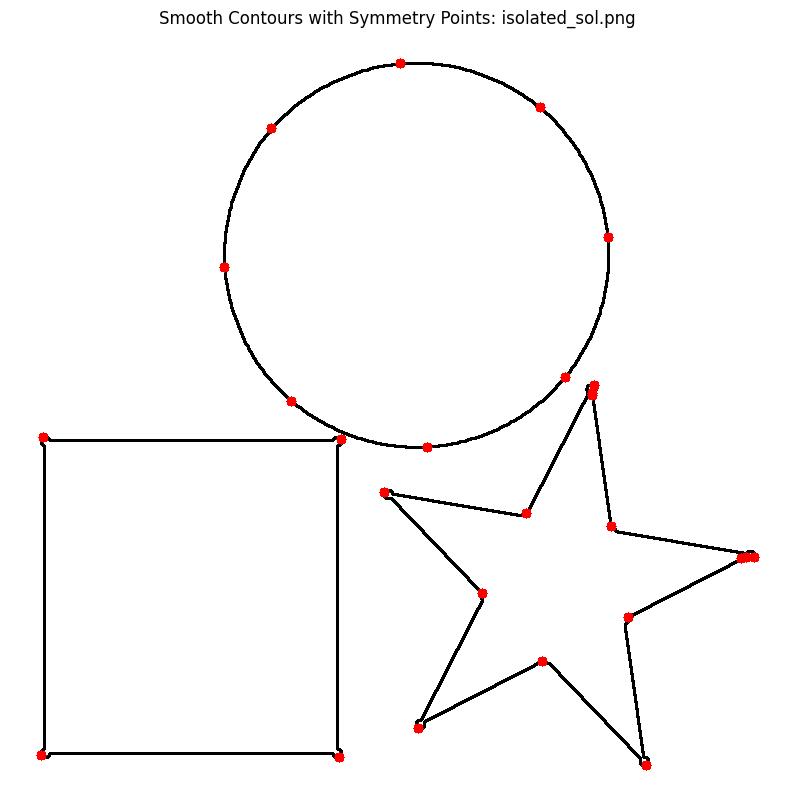

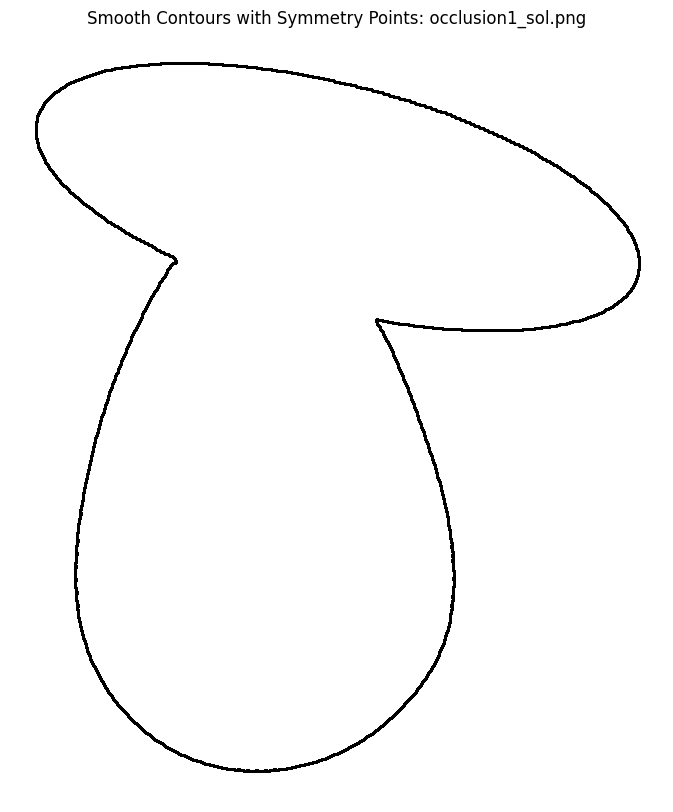

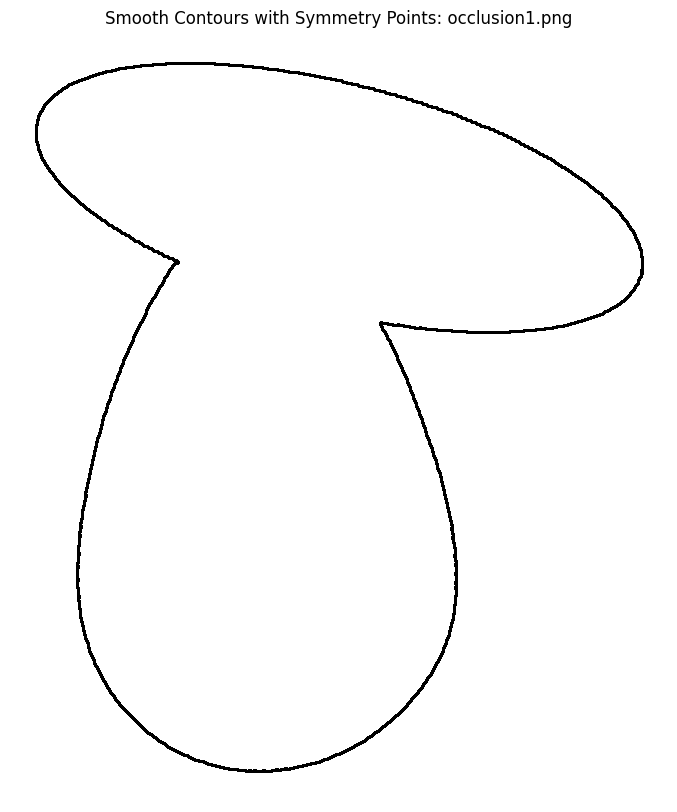

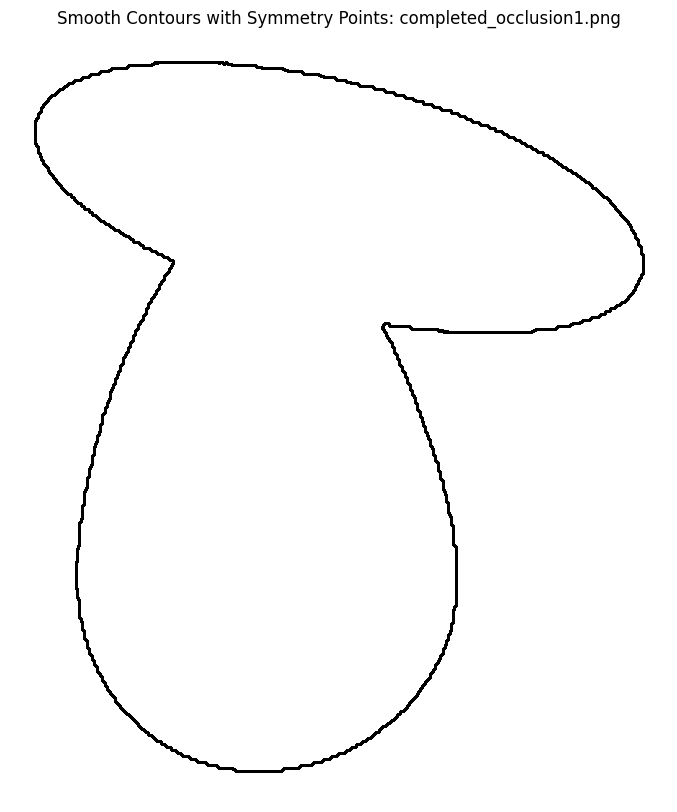

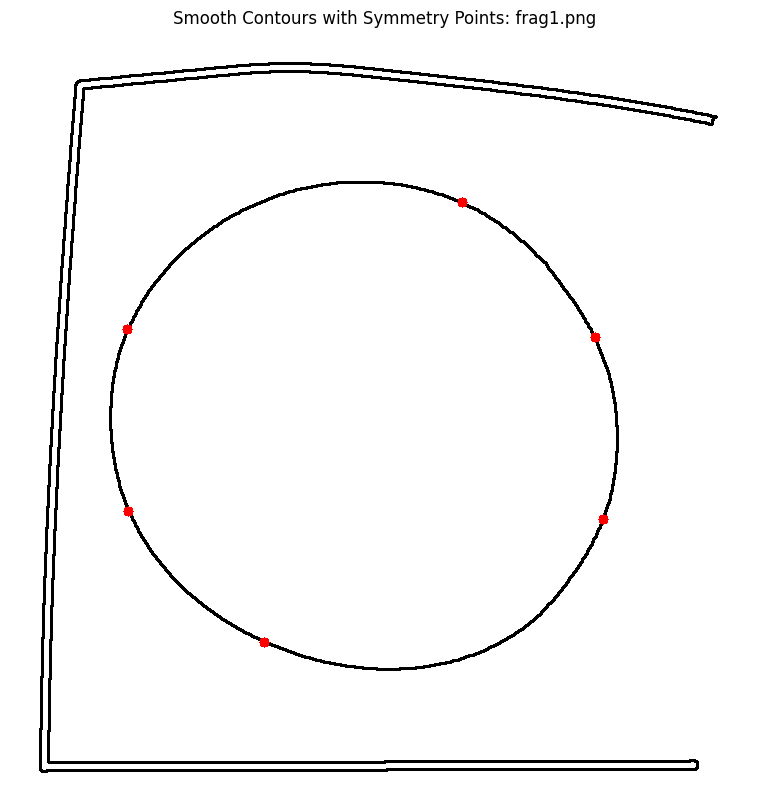

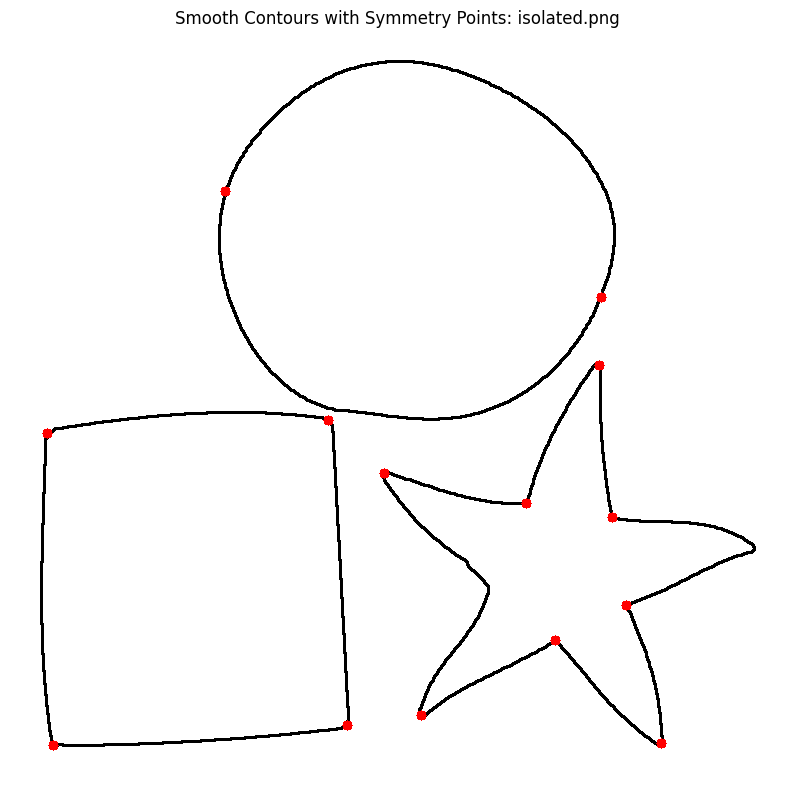

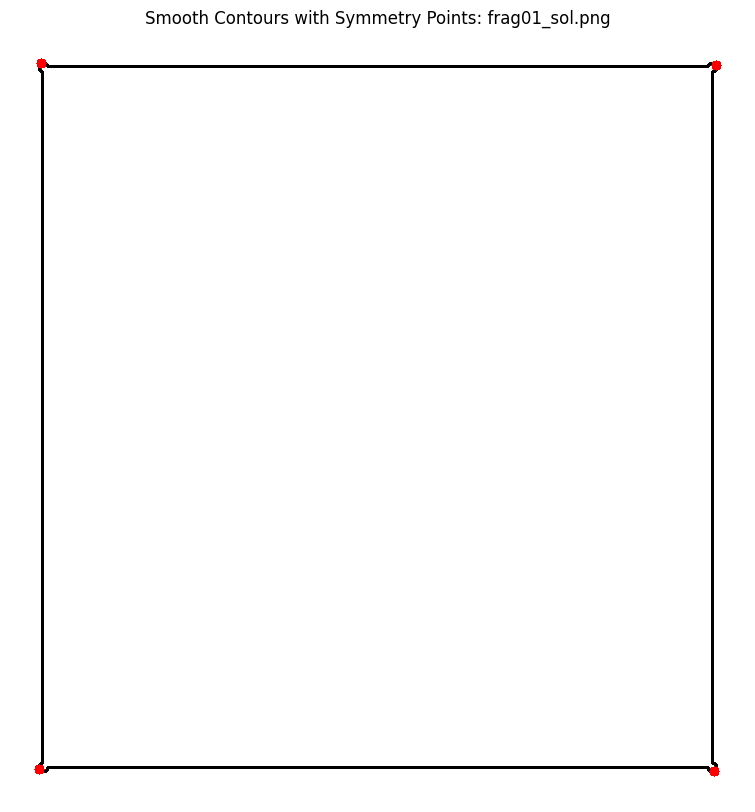

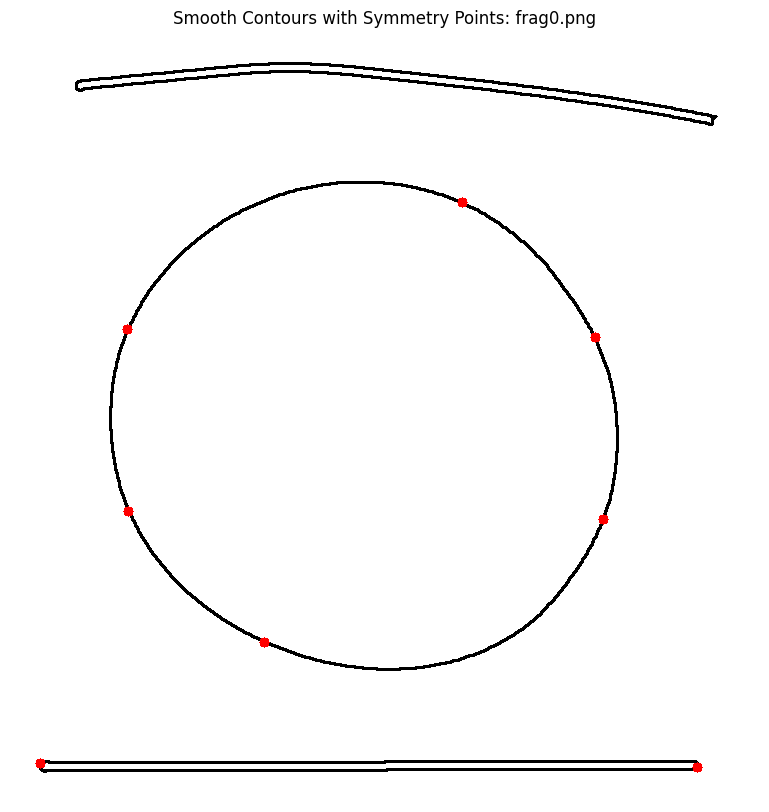

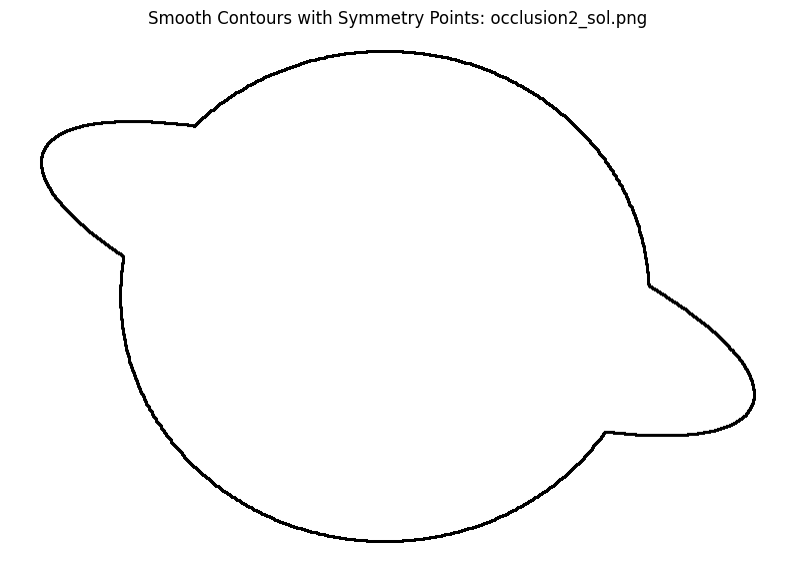

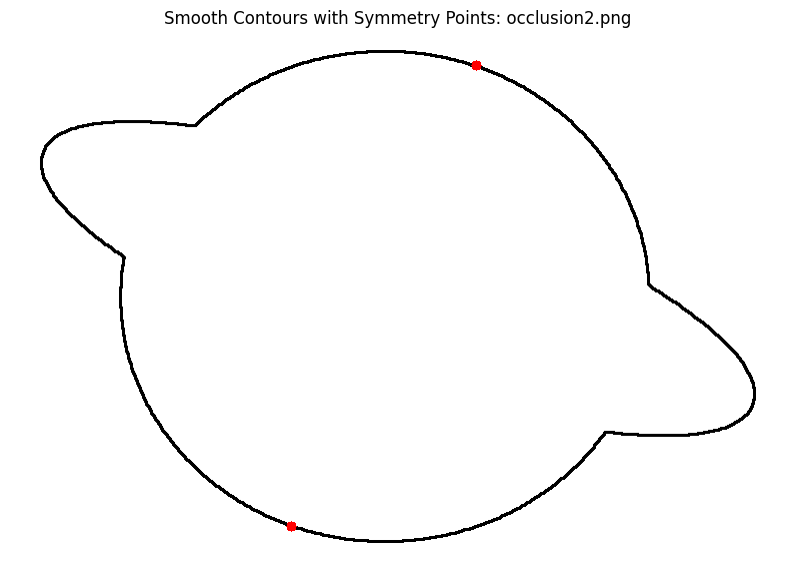

Processing complete.


In [2]:
# Main execution
examples_path = "/content/examples"

# Get all PNG files in the examples directory
png_files = [f for f in os.listdir(examples_path) if f.endswith('.png')]

if not png_files:
    print(f"No PNG files found in {examples_path}. Please upload PNG files to this folder.")
else:
    print(f"Found {len(png_files)} PNG files in {examples_path}.")

    # Process each PNG file
    for png_file in png_files:
        image_path = os.path.join(examples_path, png_file)
        result_image = process_image(image_path)

        # Display the result
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Smooth Contours with Symmetry Points: {png_file}")
        plt.axis('off')
        plt.show()

print("Processing complete.")

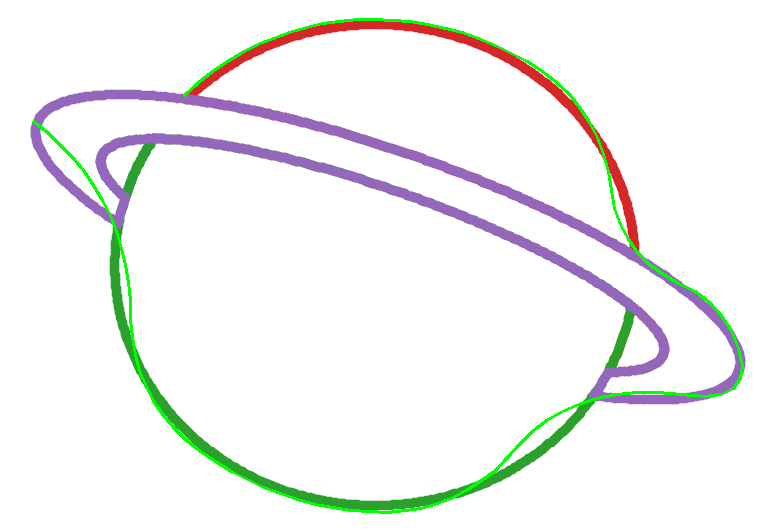

In [11]:
import cv2
import numpy as np
from scipy.interpolate import splprep, splev
from google.colab.patches import cv2_imshow

def detect_and_complete_curves(image):
    # Convert to grayscale and threshold
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    completed_image = image.copy()

    for contour in contours:
        # Approximate the contour to simplify it
        epsilon = 0.01 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # If the contour is open (not a closed shape)
        if not cv2.isContourConvex(approx):
            # Fit a spline to the contour points
            tck, u = splprep([approx[:, 0, 0], approx[:, 0, 1]], s=0, k=2)

            # Generate new points along the spline
            u_new = np.linspace(0, 1, 100)
            new_points = np.column_stack(splev(u_new, tck))

            # Draw the completed curve
            cv2.polylines(completed_image, [new_points.astype(np.int32)], False, (0, 255, 0), 2)

    return completed_image

# Usage
image = cv2.imread('/content/examples/occlusion2.png')
result = detect_and_complete_curves(image)
cv2_imshow(result)

Epoch 1/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 165s 905ms/step - accuracy: 0.9886 - loss: 0.1284 - val_accuracy: 1.0000 - val_loss: 2.3819e-04
Epoch 2/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 115s 612ms/step - accuracy: 1.0000 - loss: 1.5758e-04 - val_accuracy: 1.0000 - val_loss: 3.6252e-05
Epoch 3/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 76s 606ms/step - accuracy: 1.0000 - loss: 2.7591e-05 - val_accuracy: 1.0000 - val_loss: 1.2342e-05


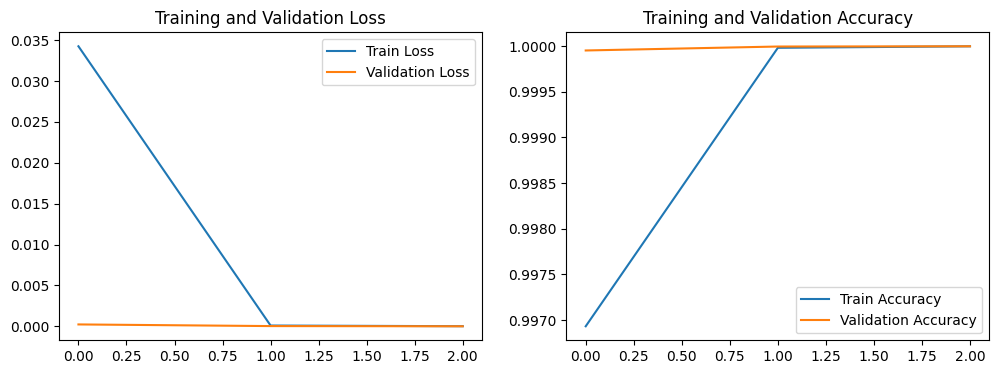

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


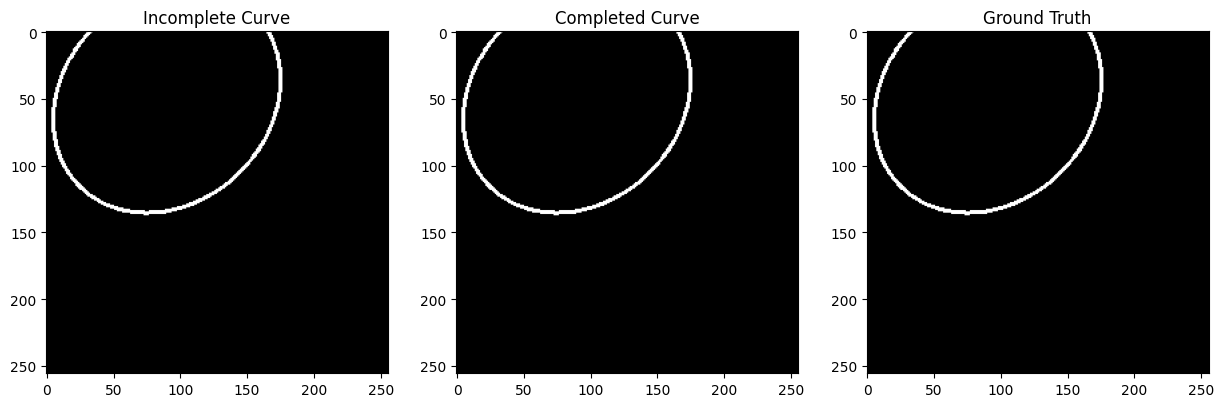

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


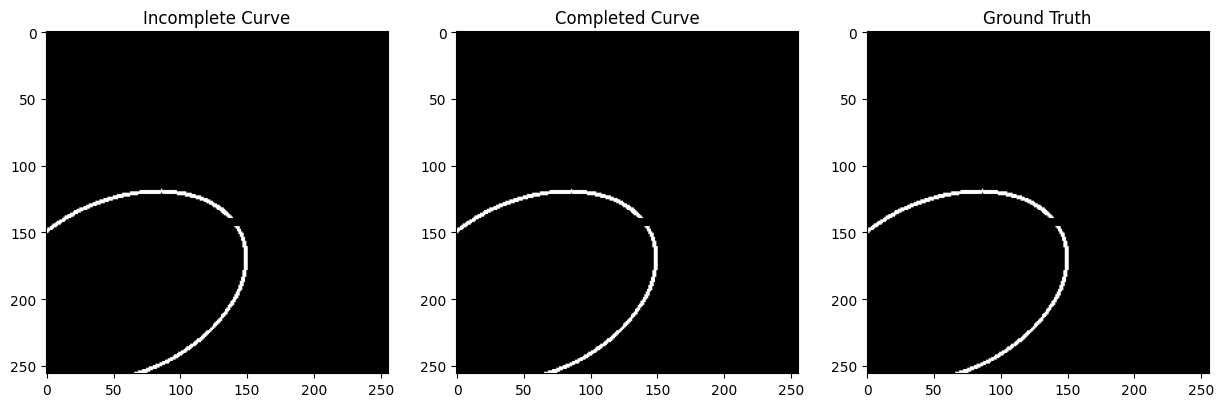

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


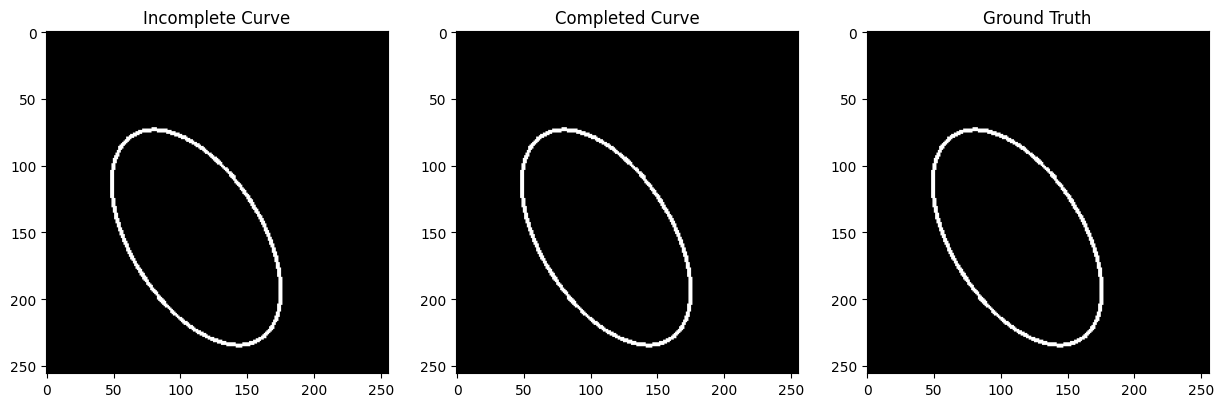

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


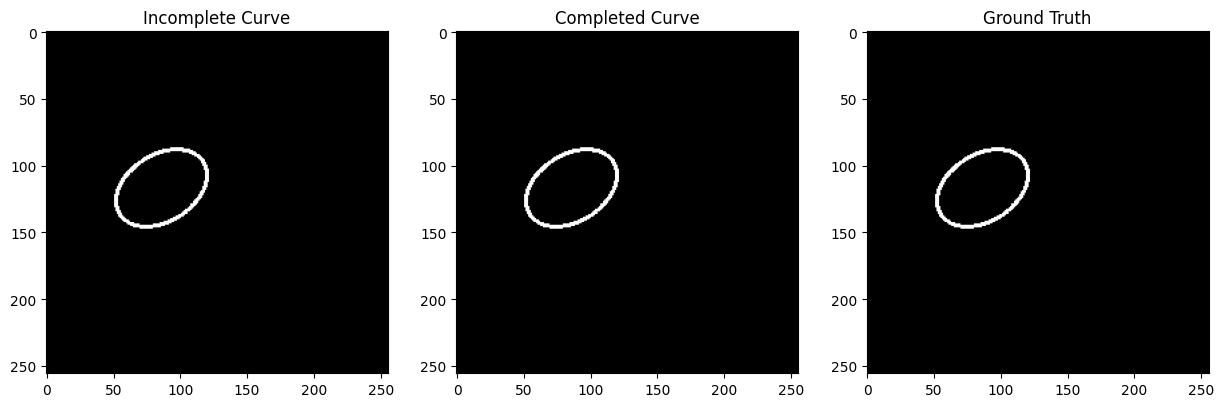

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


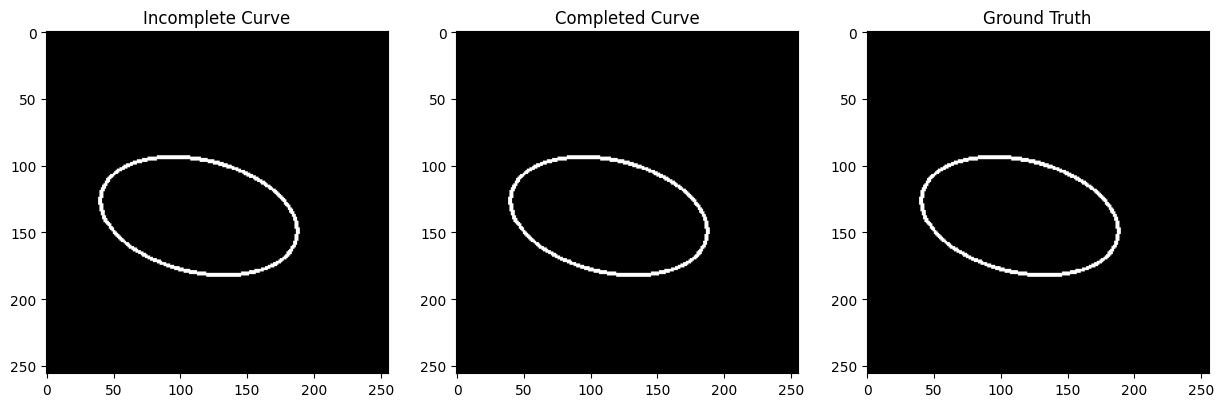

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

def unet(input_size=(256,256,1)):
    inputs = Input(input_size)

    # Encoder (downsampling)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Bridge
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)

    # Decoder (upsampling)
    up4 = UpSampling2D(size=(2, 2))(conv3)
    up4 = concatenate([up4, conv2])
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(up4)

    up5 = UpSampling2D(size=(2, 2))(conv4)
    up5 = concatenate([up5, conv1])
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(up5)

    outputs = Conv2D(1, 1, activation='sigmoid')(conv5)

    model = Model(inputs=inputs, outputs=outputs)
    return model

def generate_synthetic_data(num_samples=1000, image_size=256):
    complete_curves = []
    incomplete_curves = []

    for _ in range(num_samples):
        # Create a blank image
        image = np.zeros((image_size, image_size), dtype=np.uint8)

        # Draw a random curve (circle or ellipse)
        center = (np.random.randint(50, image_size-50), np.random.randint(50, image_size-50))
        axes = (np.random.randint(20, 100), np.random.randint(20, 100))
        angle = np.random.randint(0, 360)
        cv2.ellipse(image, center, axes, angle, 0, 360, 255, 2)

        complete_curves.append(image)

        # Create occlusion
        occlusion_type = np.random.choice(['rectangle', 'line'])
        if occlusion_type == 'rectangle':
            x1, y1 = np.random.randint(0, image_size-50, 2)
            x2, y2 = x1 + np.random.randint(30, 100), y1 + np.random.randint(30, 100)
            cv2.rectangle(image, (x1, y1), (x2, y2), 0, -1)
        else:
            pt1 = (np.random.randint(0, image_size), np.random.randint(0, image_size))
            pt2 = (np.random.randint(0, image_size), np.random.randint(0, image_size))
            cv2.line(image, pt1, pt2, 0, 5)

        incomplete_curves.append(image)

    return np.array(incomplete_curves), np.array(complete_curves)

# Generate synthetic data
X_train, y_train = generate_synthetic_data(num_samples=5000)

# Normalize the data
X_train = X_train.astype('float32') / 255.0
y_train = y_train.astype('float32') / 255.0

# Reshape for the model
X_train = np.expand_dims(X_train, axis=-1)
y_train = np.expand_dims(y_train, axis=-1)

# Create and compile the model
model = unet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Function to complete curves
def complete_curves(incomplete_image):
    # Preprocess the image
    input_image = cv2.cvtColor(incomplete_image, cv2.COLOR_BGR2GRAY)
    input_image = cv2.resize(input_image, (256, 256))
    input_image = input_image.astype('float32') / 255.0
    input_image = np.expand_dims(input_image, axis=[0, -1])

    # Predict
    completed_image = model.predict(input_image)

    # Post-process
    completed_image = (completed_image[0, :, :, 0] * 255).astype(np.uint8)
    completed_image = cv2.resize(completed_image, (incomplete_image.shape[1], incomplete_image.shape[0]))

    return completed_image

# Test the model on a few samples
num_samples = 5
for i in range(num_samples):
    # Get a random sample from the test set
    idx = np.random.randint(0, len(X_train))
    incomplete = X_train[idx]
    ground_truth = y_train[idx]

    # Complete the curve
    completed = model.predict(np.expand_dims(incomplete, axis=0))[0]

    # Display results
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(incomplete[:,:,0], cmap='gray')
    plt.title('Incomplete Curve')
    plt.subplot(132)
    plt.imshow(completed[:,:,0], cmap='gray')
    plt.title('Completed Curve')
    plt.subplot(133)
    plt.imshow(ground_truth[:,:,0], cmap='gray')
    plt.title('Ground Truth')
    plt.show()

# Save the model
model.save('curve_completion_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


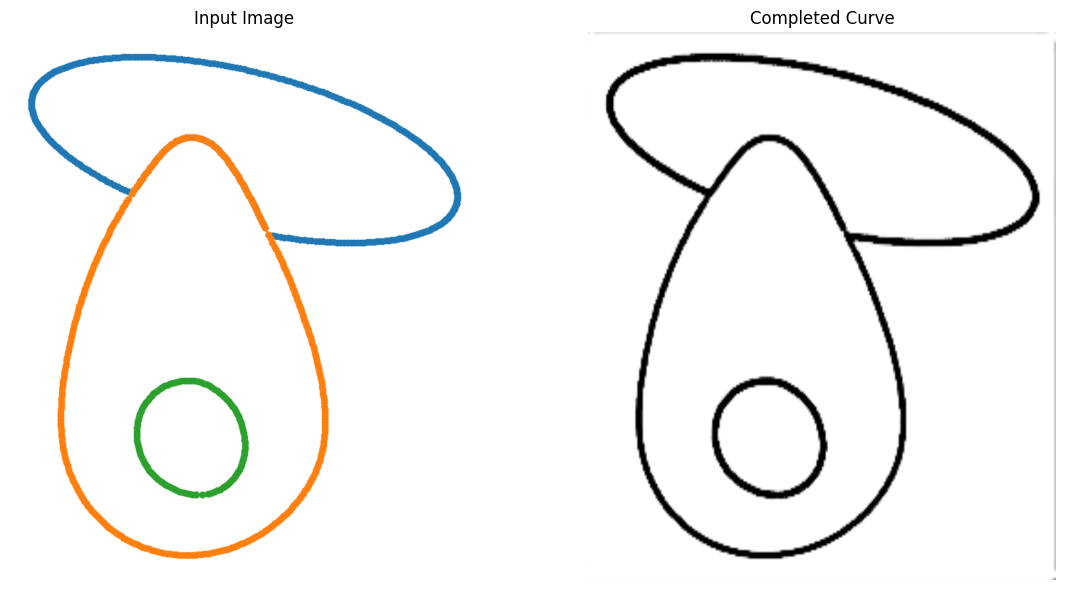

Completed image saved to /content/examples/completed_occlusion1.png


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('curve_completion_model.h5')

# Function to complete curves
def complete_curves(incomplete_image):
    # Preprocess the image
    input_image = cv2.cvtColor(incomplete_image, cv2.COLOR_BGR2GRAY)
    input_image = cv2.resize(input_image, (256, 256))
    input_image = input_image.astype('float32') / 255.0
    input_image = np.expand_dims(input_image, axis=[0, -1])

    # Predict
    completed_image = model.predict(input_image)

    # Post-process
    completed_image = (completed_image[0, :, :, 0] * 255).astype(np.uint8)
    completed_image = cv2.resize(completed_image, (incomplete_image.shape[1], incomplete_image.shape[0]))

    return completed_image

# Load and process the image
image_path = '/content/examples/occlusion1.png'
input_image = cv2.imread(image_path)
if input_image is None:
    raise ValueError(f"Unable to read image at {image_path}")

# Complete the curve
completed_image = complete_curves(input_image)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(completed_image, cmap='gray')
plt.title('Completed Curve')
plt.axis('off')

plt.tight_layout()
plt.show()

# Optionally, save the output image
output_path = '/content/examples/completed_occlusion1.png'
cv2.imwrite(output_path, completed_image)
print(f"Completed image saved to {output_path}")